In [1]:
import rpy2

%load_ext rpy2.ipython

In [2]:
%%R
library(tidyverse)
library(ggpubr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [161]:
%%R
df20 <- read_delim('../results/combined/all.csv', delim=',') %>% group_by(genus,species) %>% filter(!(chr=='chrX')) %>% filter(freq_mean > 0.5) %>% mutate(recomb_bin = ntile(cm_per_mb, 20))  %>% filter(!(species %in% c('zaza','albinasus')))
pg_namedf <- read_delim('../data/genus_phylogenetic_group_metadata.txt', delim='\t')
merge_pg_name <- left_join(df20,pg_namedf, by = c('genus'='genus'))
merge_pg_name$pg_name <- as_factor(merge_pg_name$pg_name)


Rows: 5257244 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): chr, species, genus
dbl (13): start, end, freq_mean, freq_min, freq_max, freq_median, window_siz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 57 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): genus, pg_name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [196]:
%%R
nes

# A tibble: 187 × 5
   genus          species      NE_MEAN NE_MEDIAN name                       
   <chr>          <chr>          <dbl>     <dbl> <chr>                      
 1 Allenopithecus nigroviridis  52454.    48795. Allenopithecus_nigroviridis
 2 Allochrocebus  lhoesti       91523.    83266. Allochrocebus_lhoesti      
 3 Allochrocebus  preussi       98962.    91644. Allochrocebus_preussi      
 4 Allochrocebus  solatus      110522.   101523. Allochrocebus_solatus      
 5 Alouatta       belzebul      59406.    54570. Alouatta_belzebul          
 6 Alouatta       caraya        37473.    35650. Alouatta_caraya            
 7 Alouatta       discolor      75638.    66639. Alouatta_discolor          
 8 Alouatta       juara         70735.    65093. Alouatta_juara             
 9 Alouatta       macconnelli   67134.    61665. Alouatta_macconnelli       
10 Alouatta       nigerrima     69902.    64414. Alouatta_nigerrima         
# ℹ 177 more rows
# ℹ Use `print(n = ...)` to see more r

In [192]:
%%R
vlineg <- merge_pg_name %>%
    filter(freq_mean > 0.5) %>% 
    filter(!(chr=='chrX')) %>% 
    group_by(genus,species,recomb_bin) %>%
    reframe(
        median = median(PI))
vlineg

# A tibble: 3,840 × 4
   genus          species      recomb_bin  median
   <chr>          <chr>             <int>   <dbl>
 1 Allenopithecus nigroviridis          1 0.00125
 2 Allenopithecus nigroviridis          2 0.00137
 3 Allenopithecus nigroviridis          3 0.00144
 4 Allenopithecus nigroviridis          4 0.00145
 5 Allenopithecus nigroviridis          5 0.00151
 6 Allenopithecus nigroviridis          6 0.00153
 7 Allenopithecus nigroviridis          7 0.00151
 8 Allenopithecus nigroviridis          8 0.00157
 9 Allenopithecus nigroviridis          9 0.00154
10 Allenopithecus nigroviridis         10 0.00154
# ℹ 3,830 more rows
# ℹ Use `print(n = ...)` to see more rows


In [193]:
%%R
median_09_095 <- merge_pg_name %>%
    group_by(genus,species) %>%
    reframe(
        total_median = median(PI),
        quan90 = quantile(PI,0.9),
        quan95 = quantile(PI,0.95))
median_09_095

# A tibble: 192 × 5
   genus          species      total_median  quan90  quan95
   <chr>          <chr>               <dbl>   <dbl>   <dbl>
 1 Allenopithecus nigroviridis      0.00156 0.00256 0.00297
 2 Allochrocebus  lhoesti           0.00280 0.00460 0.00521
 3 Allochrocebus  preussi           0.00303 0.00534 0.00617
 4 Allochrocebus  solatus           0.00372 0.00627 0.00711
 5 Alouatta       belzebul          0.00184 0.00337 0.00404
 6 Alouatta       caraya            0.00127 0.00235 0.00302
 7 Alouatta       discolor          0.00230 0.00408 0.00494
 8 Alouatta       juara             0.00235 0.00368 0.00440
 9 Alouatta       macconnelli       0.00231 0.00353 0.00410
10 Alouatta       nigerrima         0.00231 0.00351 0.00394
# ℹ 182 more rows
# ℹ Use `print(n = ...)` to see more rows


In [198]:
%%R
df <- left_join(vlineg,median_09_095,by = c('genus'='genus','species'='species'))
df$name <- paste0(df$genus,'_',df$species)
df$name <- as_factor(df$name)
df 

# A tibble: 3,840 × 8
   genus          species  recomb_bin  median total_median  quan90  quan95 name 
   <chr>          <chr>         <int>   <dbl>        <dbl>   <dbl>   <dbl> <fct>
 1 Allenopithecus nigrovi…          1 0.00125      0.00156 0.00256 0.00297 Alle…
 2 Allenopithecus nigrovi…          2 0.00137      0.00156 0.00256 0.00297 Alle…
 3 Allenopithecus nigrovi…          3 0.00144      0.00156 0.00256 0.00297 Alle…
 4 Allenopithecus nigrovi…          4 0.00145      0.00156 0.00256 0.00297 Alle…
 5 Allenopithecus nigrovi…          5 0.00151      0.00156 0.00256 0.00297 Alle…
 6 Allenopithecus nigrovi…          6 0.00153      0.00156 0.00256 0.00297 Alle…
 7 Allenopithecus nigrovi…          7 0.00151      0.00156 0.00256 0.00297 Alle…
 8 Allenopithecus nigrovi…          8 0.00157      0.00156 0.00256 0.00297 Alle…
 9 Allenopithecus nigrovi…          9 0.00154      0.00156 0.00256 0.00297 Alle…
10 Allenopithecus nigrovi…         10 0.00154      0.00156 0.00256 0.00297 Alle…
# ℹ 3,

In [199]:
%%R
df <- left_join(df,nes,by=c('name'='name'))
df

# A tibble: 3,840 × 12
   genus.x       species.x recomb_bin  median total_median  quan90  quan95 name 
   <chr>         <chr>          <int>   <dbl>        <dbl>   <dbl>   <dbl> <chr>
 1 Allenopithec… nigrovir…          1 0.00125      0.00156 0.00256 0.00297 Alle…
 2 Allenopithec… nigrovir…          2 0.00137      0.00156 0.00256 0.00297 Alle…
 3 Allenopithec… nigrovir…          3 0.00144      0.00156 0.00256 0.00297 Alle…
 4 Allenopithec… nigrovir…          4 0.00145      0.00156 0.00256 0.00297 Alle…
 5 Allenopithec… nigrovir…          5 0.00151      0.00156 0.00256 0.00297 Alle…
 6 Allenopithec… nigrovir…          6 0.00153      0.00156 0.00256 0.00297 Alle…
 7 Allenopithec… nigrovir…          7 0.00151      0.00156 0.00256 0.00297 Alle…
 8 Allenopithec… nigrovir…          8 0.00157      0.00156 0.00256 0.00297 Alle…
 9 Allenopithec… nigrovir…          9 0.00154      0.00156 0.00256 0.00297 Alle…
10 Allenopithec… nigrovir…         10 0.00154      0.00156 0.00256 0.00297 Alle…
# ℹ 3

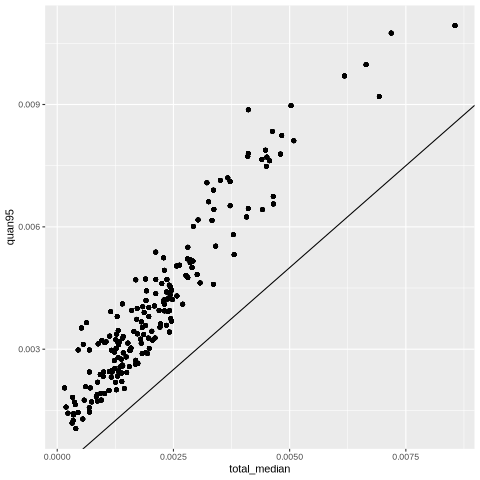

In [165]:
%%R
df %>% 
    ggplot()+
    geom_point(aes(x=total_median, y=quan95))+
    geom_abline(aes(intercept=0,slope=1))

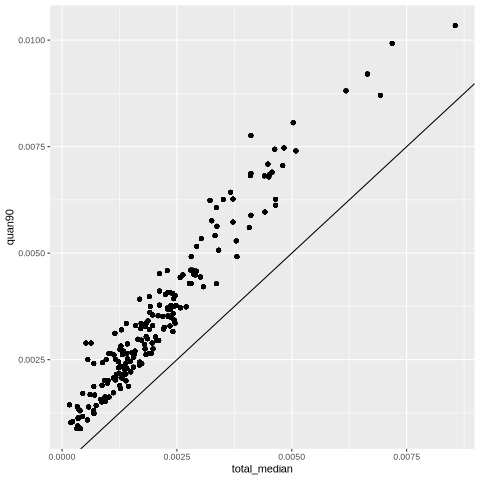

In [166]:
%%R
df %>% 
    ggplot()+
    geom_point(aes(x=total_median, y=quan90))+
    geom_abline(aes(intercept=0,slope=1))

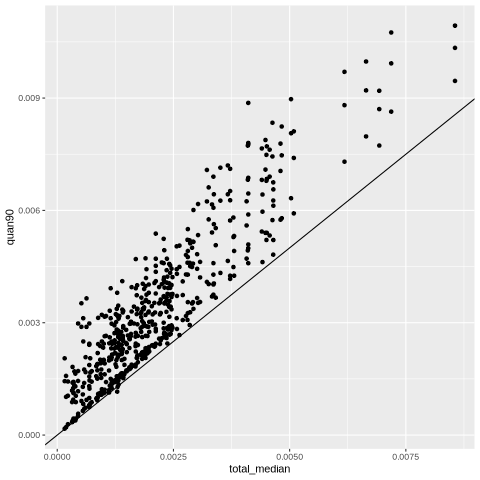

In [167]:
%%R
df %>% 
    filter(recomb_bin==20) %>%
    ggplot()+
    geom_point(aes(x=total_median, y=quan90))+
    geom_point(aes(x=total_median, y=quan95))+
    geom_point(aes(x=total_median, y=median))+
    geom_abline(aes(intercept=0,slope=1))

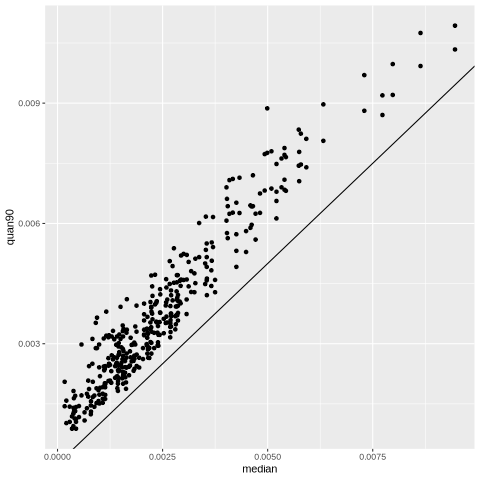

In [168]:
%%R
df %>% 
    filter(recomb_bin==20) %>%
    ggplot()+
    geom_point(aes(x=median, y=quan90))+
    geom_point(aes(x=median, y=quan95))+
    geom_abline(aes(intercept=0,slope=1))

In [169]:
%%R
df_long <- df %>%
  pivot_longer(cols = c(median, total_median, quan90, quan95),
               names_to = "type",
               values_to = "pi")
df_long

# A tibble: 15,360 × 6
   genus          species      recomb_bin name                     type       pi
   <chr>          <chr>             <int> <fct>                    <chr>   <dbl>
 1 Allenopithecus nigroviridis          1 Allenopithecus_nigrovir… medi… 0.00125
 2 Allenopithecus nigroviridis          1 Allenopithecus_nigrovir… tota… 0.00156
 3 Allenopithecus nigroviridis          1 Allenopithecus_nigrovir… quan… 0.00256
 4 Allenopithecus nigroviridis          1 Allenopithecus_nigrovir… quan… 0.00297
 5 Allenopithecus nigroviridis          2 Allenopithecus_nigrovir… medi… 0.00137
 6 Allenopithecus nigroviridis          2 Allenopithecus_nigrovir… tota… 0.00156
 7 Allenopithecus nigroviridis          2 Allenopithecus_nigrovir… quan… 0.00256
 8 Allenopithecus nigroviridis          2 Allenopithecus_nigrovir… quan… 0.00297
 9 Allenopithecus nigroviridis          3 Allenopithecus_nigrovir… medi… 0.00144
10 Allenopithecus nigroviridis          3 Allenopithecus_nigrovir… tota… 0.00156
# ℹ 1

In [189]:
%%R
nes <- read_delim('../results/model/Nested_model/Ne_Pi_recomb.csv', delim = ',') %>% select('genus','species','NE_MEAN','NE_MEDIAN')
nes <- nes %>% 
    group_by(genus,species) %>%
    reframe(
        NE_MEAN = mean(NE_MEAN),
        NE_MEDIAN = mean(NE_MEDIAN))
nes <- nes %>% mutate(name=paste0(genus,'_',species))


New names:
• `` -> `...1`
Rows: 5071829 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): genus, species, FAMILY, chr
dbl (21): ...1, Unnamed: 0, MEAN, MEDIAN, VARIANCE, NE_MEAN, NE_MEDIAN, NE_V...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [171]:
%%R
dftest <- left_join(df_long,nes,by = c('name'='name','genus'='genus','species'='species'))
dftest

# A tibble: 15,360 × 8
   genus          species      recomb_bin name   type       pi NE_MEAN NE_MEDIAN
   <chr>          <chr>             <int> <chr>  <chr>   <dbl>   <dbl>     <dbl>
 1 Allenopithecus nigroviridis          1 Allen… medi… 0.00125  52454.    48795.
 2 Allenopithecus nigroviridis          1 Allen… tota… 0.00156  52454.    48795.
 3 Allenopithecus nigroviridis          1 Allen… quan… 0.00256  52454.    48795.
 4 Allenopithecus nigroviridis          1 Allen… quan… 0.00297  52454.    48795.
 5 Allenopithecus nigroviridis          2 Allen… medi… 0.00137  52454.    48795.
 6 Allenopithecus nigroviridis          2 Allen… tota… 0.00156  52454.    48795.
 7 Allenopithecus nigroviridis          2 Allen… quan… 0.00256  52454.    48795.
 8 Allenopithecus nigroviridis          2 Allen… quan… 0.00297  52454.    48795.
 9 Allenopithecus nigroviridis          3 Allen… medi… 0.00144  52454.    48795.
10 Allenopithecus nigroviridis          3 Allen… tota… 0.00156  52454.    48795.
# ℹ 1

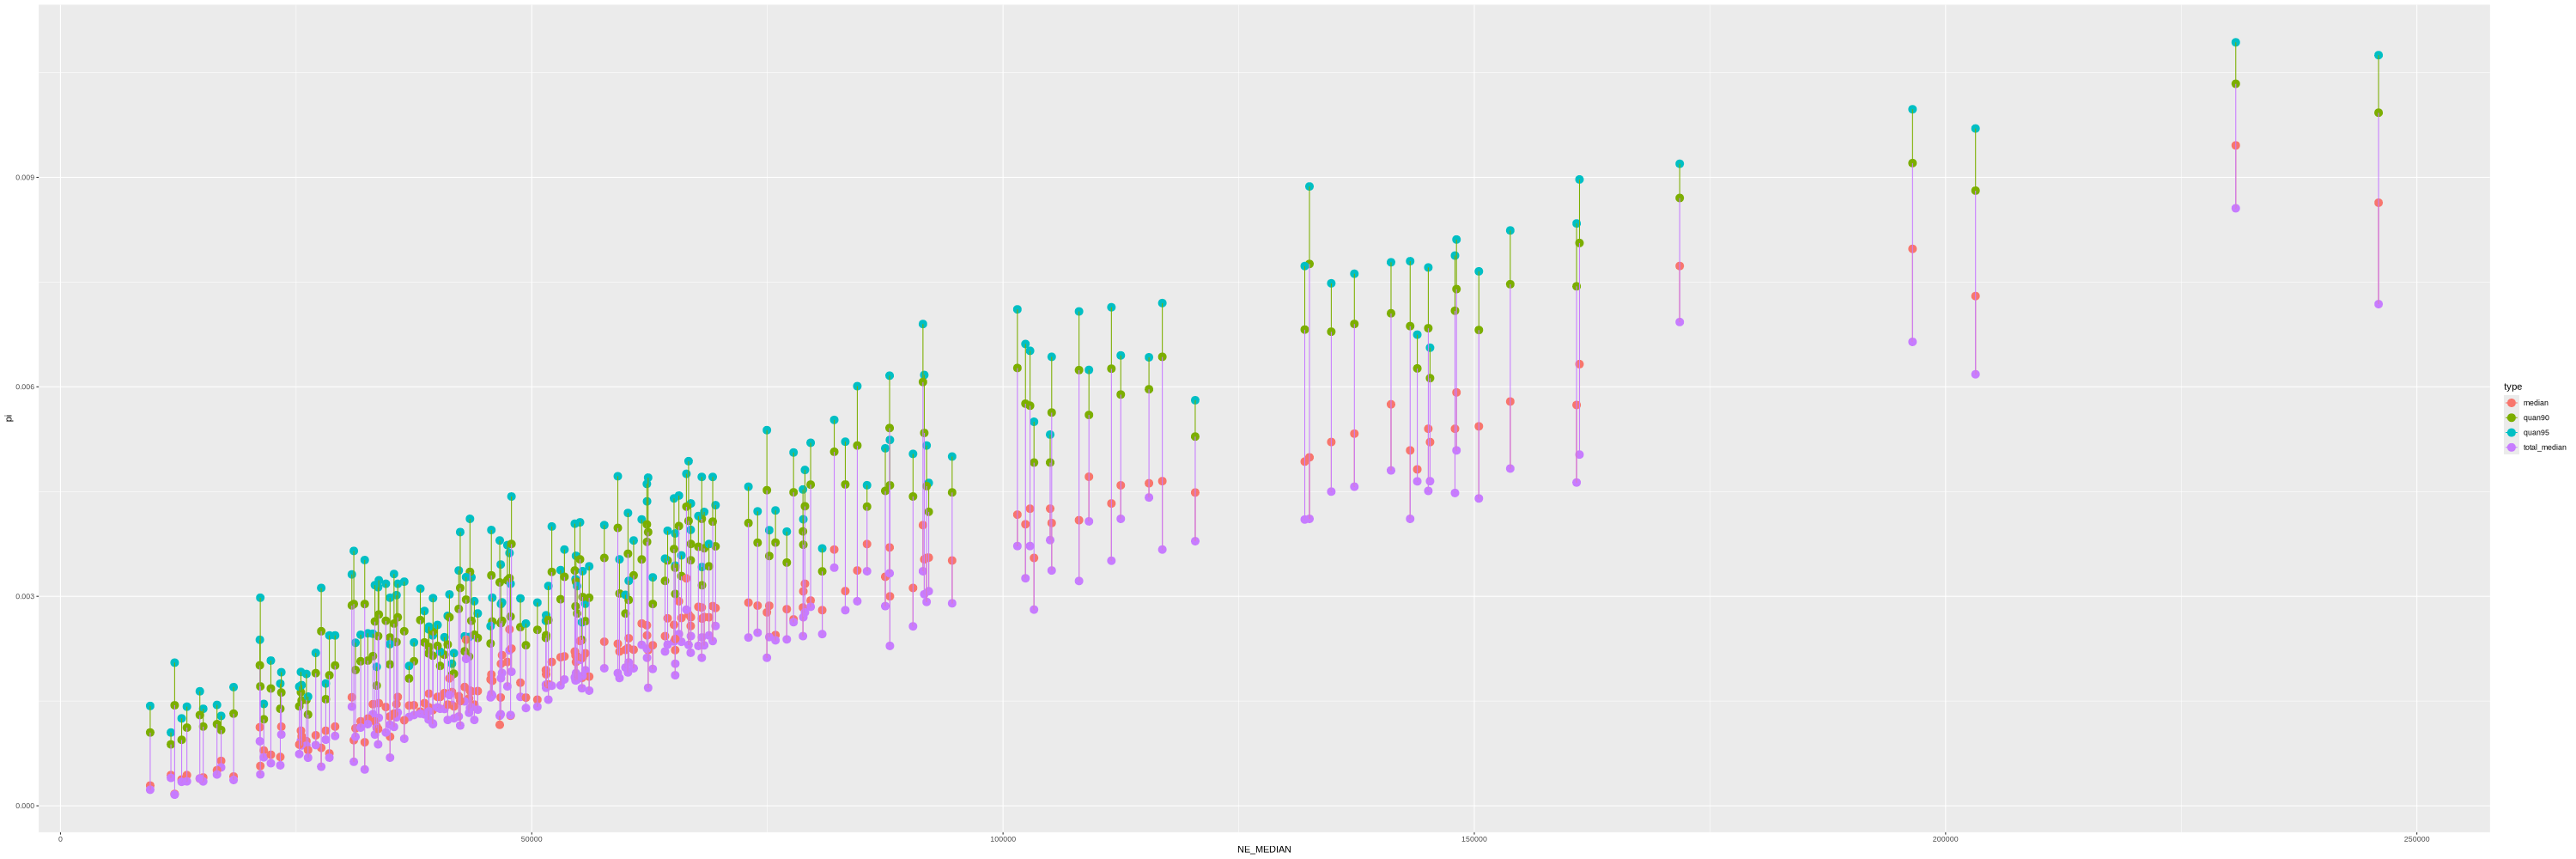

In [172]:
%%R -h 1000 -w 3000
dftest %>%
    filter(!(species %in% c('zaza','albinasus'))) %>%
    filter(recomb_bin==20) %>%
    ggplot(aes(x=NE_MEDIAN,y=pi,col=type))+
    geom_point(size=4)+
    geom_line(aes(group=name))

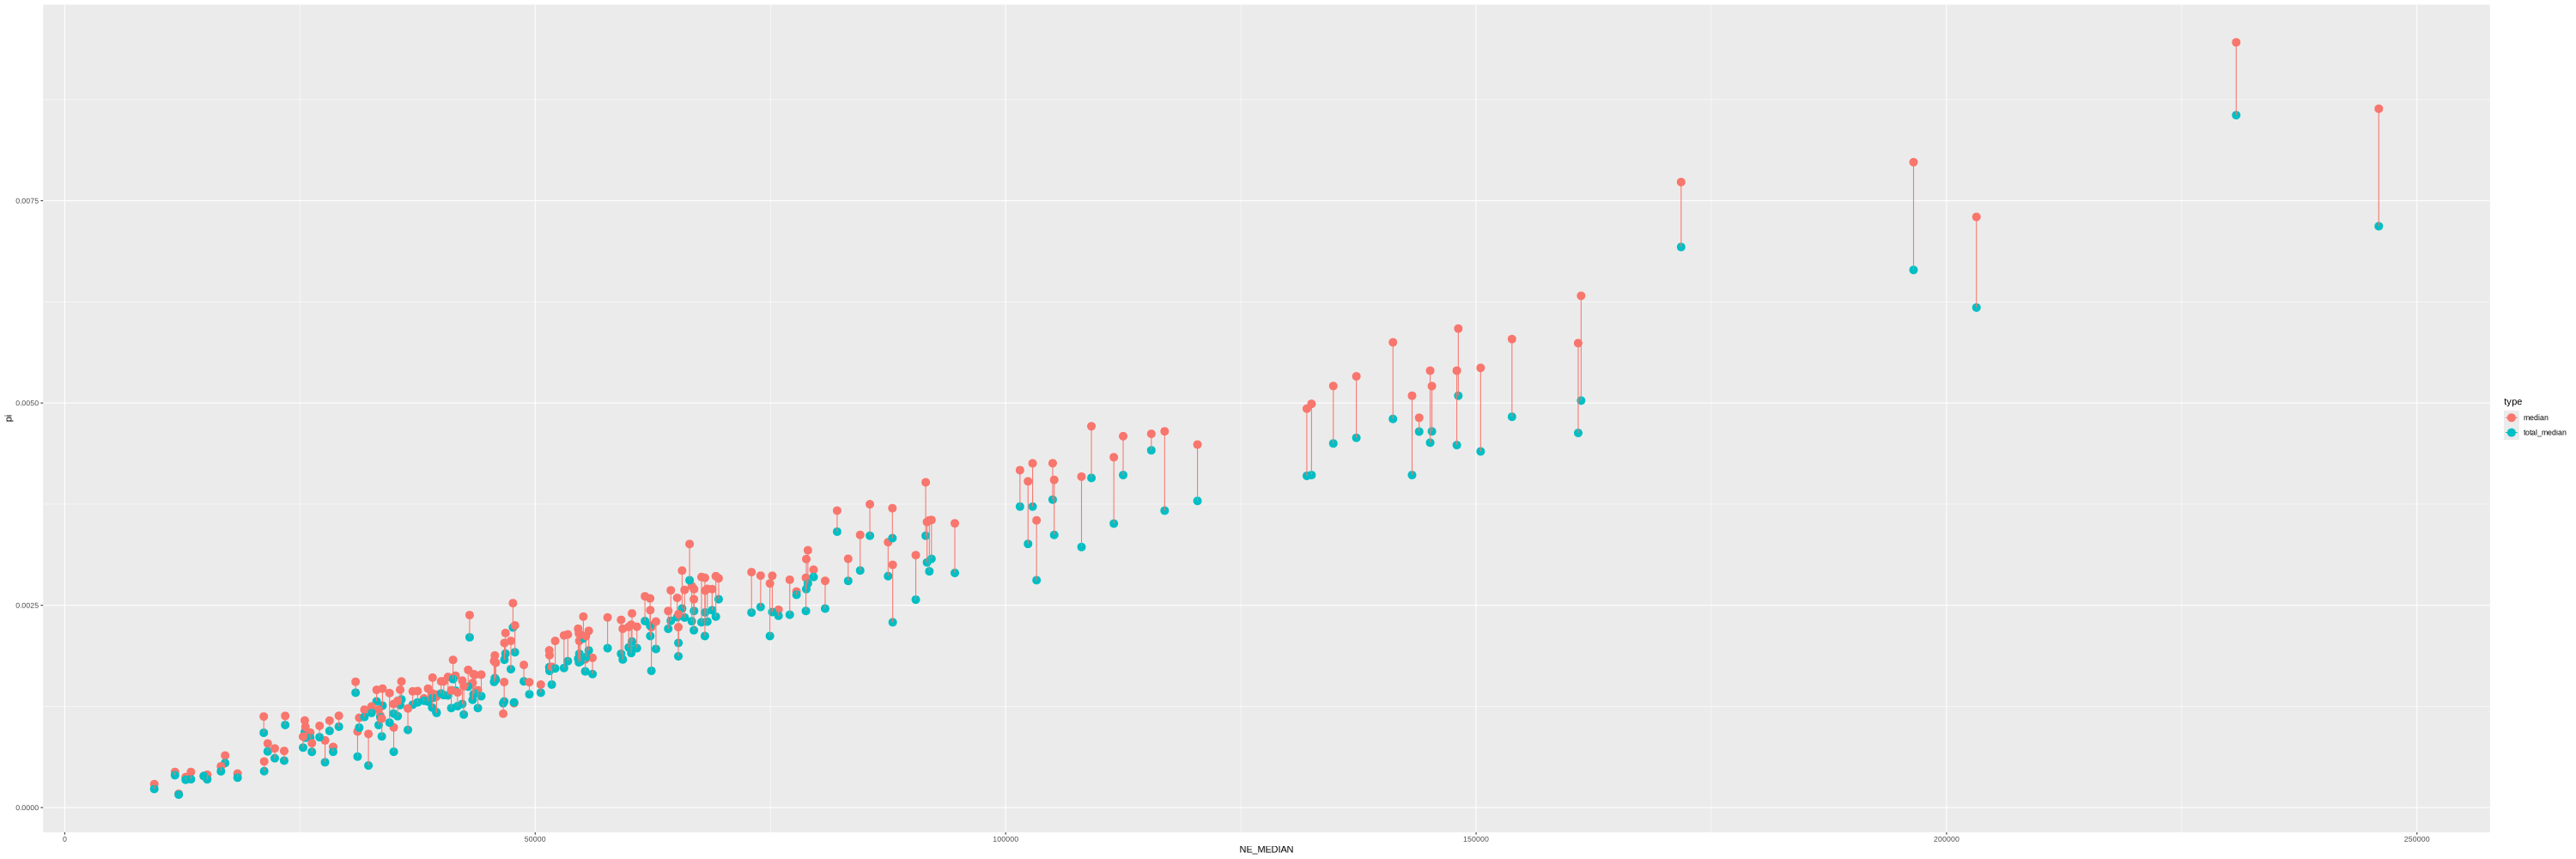

In [173]:
%%R -h 1000 -w 3000
dftest %>%
    filter(!(species %in% c('zaza','albinasus'))) %>%
    filter(type %in% c('total_median','median')) %>%
    filter(recomb_bin==20) %>%
    ggplot(aes(x=NE_MEDIAN,y=pi,col=type))+
    geom_point(size=4)+
    geom_line(aes(group=name))

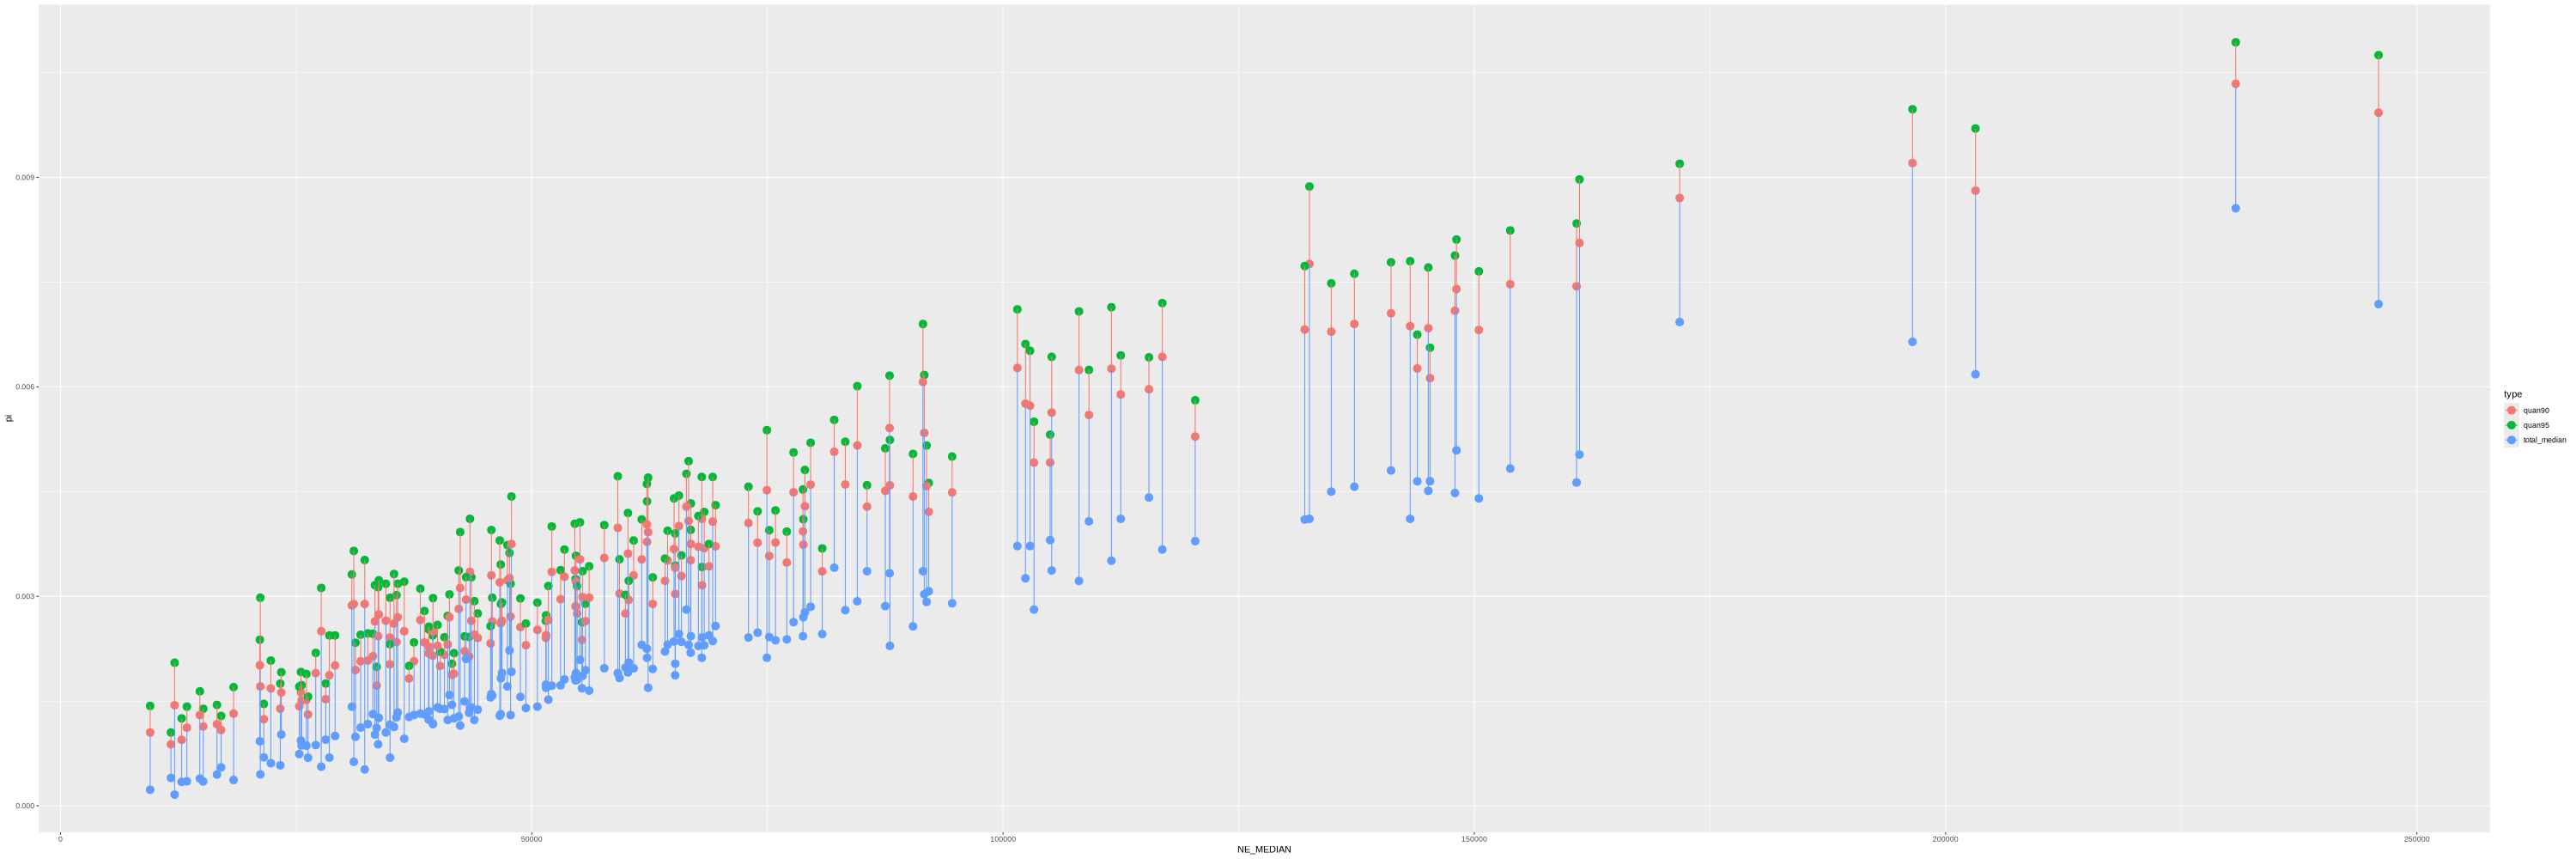

In [174]:
%%R -h 1000 -w 3000
dftest %>%
    filter(!(species %in% c('zaza','albinasus'))) %>%
    filter(type %in% c('total_median','quan90','quan95')) %>%
    filter(recomb_bin==20) %>%
    ggplot(aes(x=NE_MEDIAN,y=pi,col=type))+
    geom_point(size=4)+
    geom_line(aes(group=name))

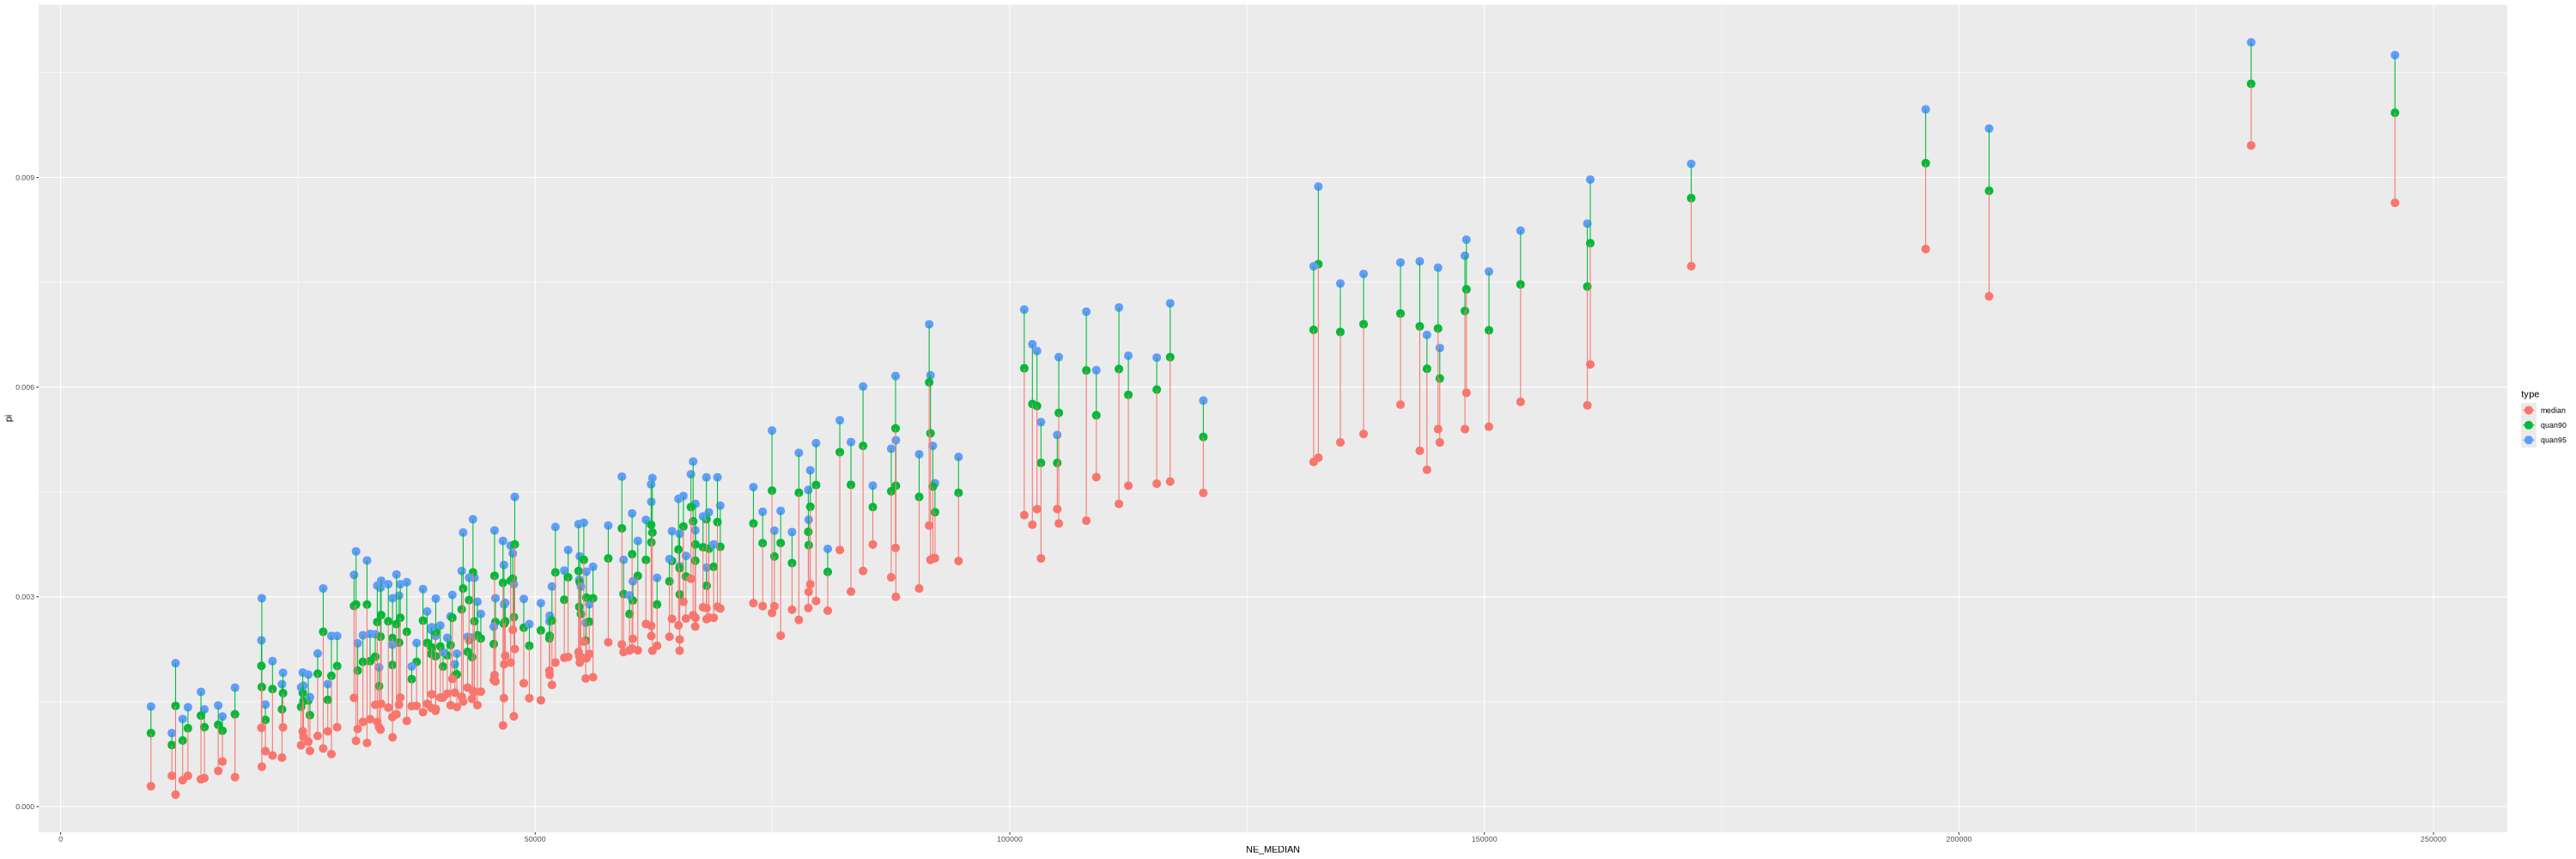

In [175]:
%%R -h 1000 -w 3000
dftest %>%
    filter(!(species %in% c('zaza','albinasus'))) %>%
    filter(type %in% c('median','quan90','quan95')) %>%
    filter(recomb_bin==20) %>%
    ggplot(aes(x=NE_MEDIAN,y=pi,col=type))+
    geom_point(size=4)+
   geom_line(aes(group=name))

`geom_smooth()` using formula = 'y ~ x'


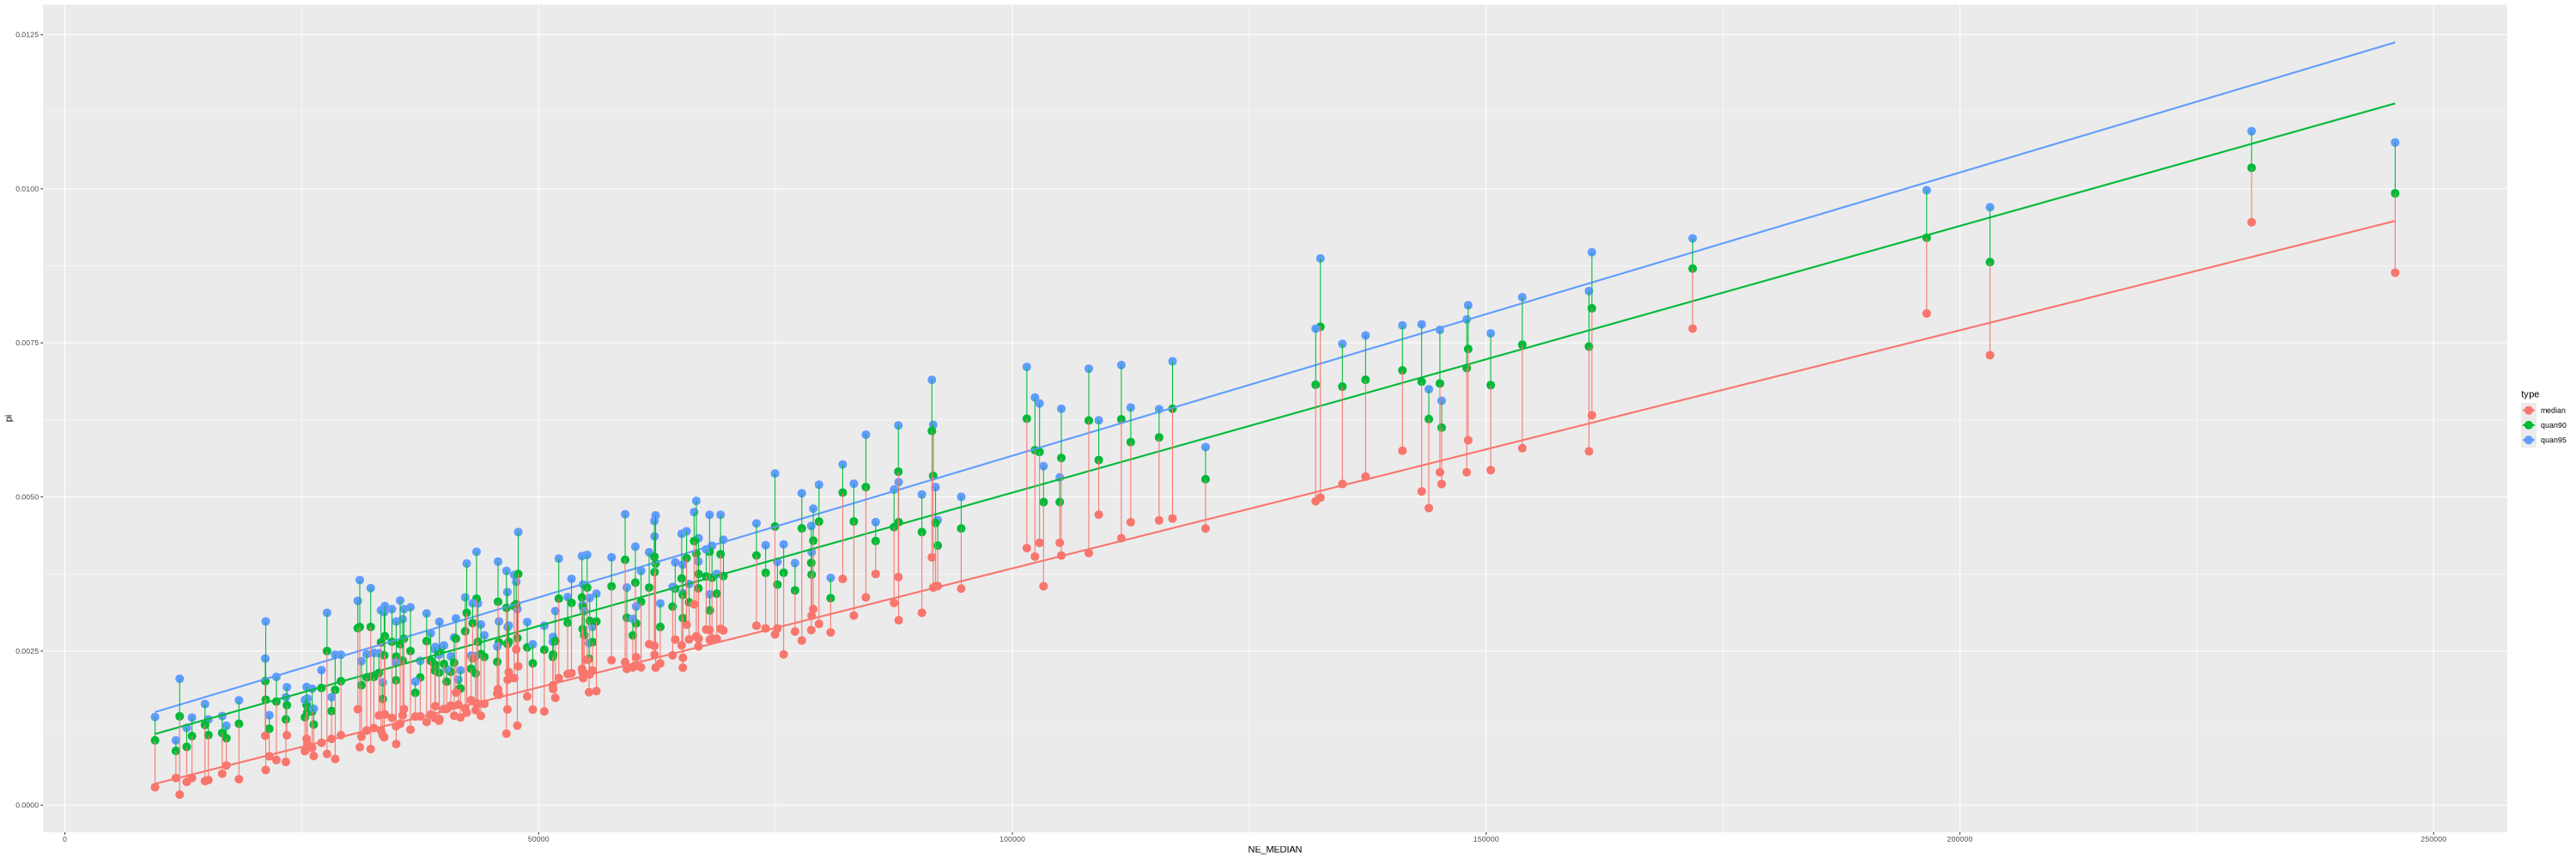

In [176]:
%%R -h 1000 -w 3000
dftest %>%
    filter(!(species %in% c('zaza','albinasus'))) %>%
    filter(type %in% c('median','quan90','quan95')) %>%
    filter(recomb_bin==20) %>%
    ggplot(aes(x=NE_MEDIAN,y=pi,col=type))+
    geom_point(size=4)+
    geom_smooth(method='lm', se = F) +
    geom_line(aes(group=name))

In [102]:
%%R
merge_pg_name <- merge_pg_name %>% mutate(name = paste0(genus,'_',species))

In [104]:
%%R
each_species <-  left_join(merge_pg_name,vlineg, by = c('genus'='genus','species'='species','recomb_bin'='recomb_bin'))
each_species <- left_join(each_species,median_09_095,by = c('genus'='genus','species'='species'))

In [105]:
%%R
each_species

# A tibble: 4,225,595 × 23
# Groups:   genus, species [194]
   chr     start    end freq_mean freq_min freq_max freq_median window_size_mean
   <chr>   <dbl>  <dbl>     <dbl>    <dbl>    <dbl>       <dbl>            <dbl>
 1 chr1  1800001 1.9 e6     0.677    0.677    0.677       0.677            99999
 2 chr1  1900001 2   e6     0.571    0.571    0.571       0.571            99999
 3 chr1  2100001 2.20e6     0.671    0.671    0.671       0.671            99999
 4 chr1  2200001 2.3 e6     0.727    0.727    0.727       0.727            99999
 5 chr1  2400001 2.5 e6     0.748    0.748    0.748       0.748            99999
 6 chr1  2500001 2.6 e6     0.755    0.755    0.755       0.755            99999
 7 chr1  2800001 2.90e6     0.685    0.685    0.685       0.685            99999
 8 chr1  2900001 3   e6     0.706    0.706    0.706       0.706            99999
 9 chr1  3000001 3.10e6     0.747    0.747    0.747       0.747            99999
10 chr1  3100001 3.20e6     0.849    0.849    0.8

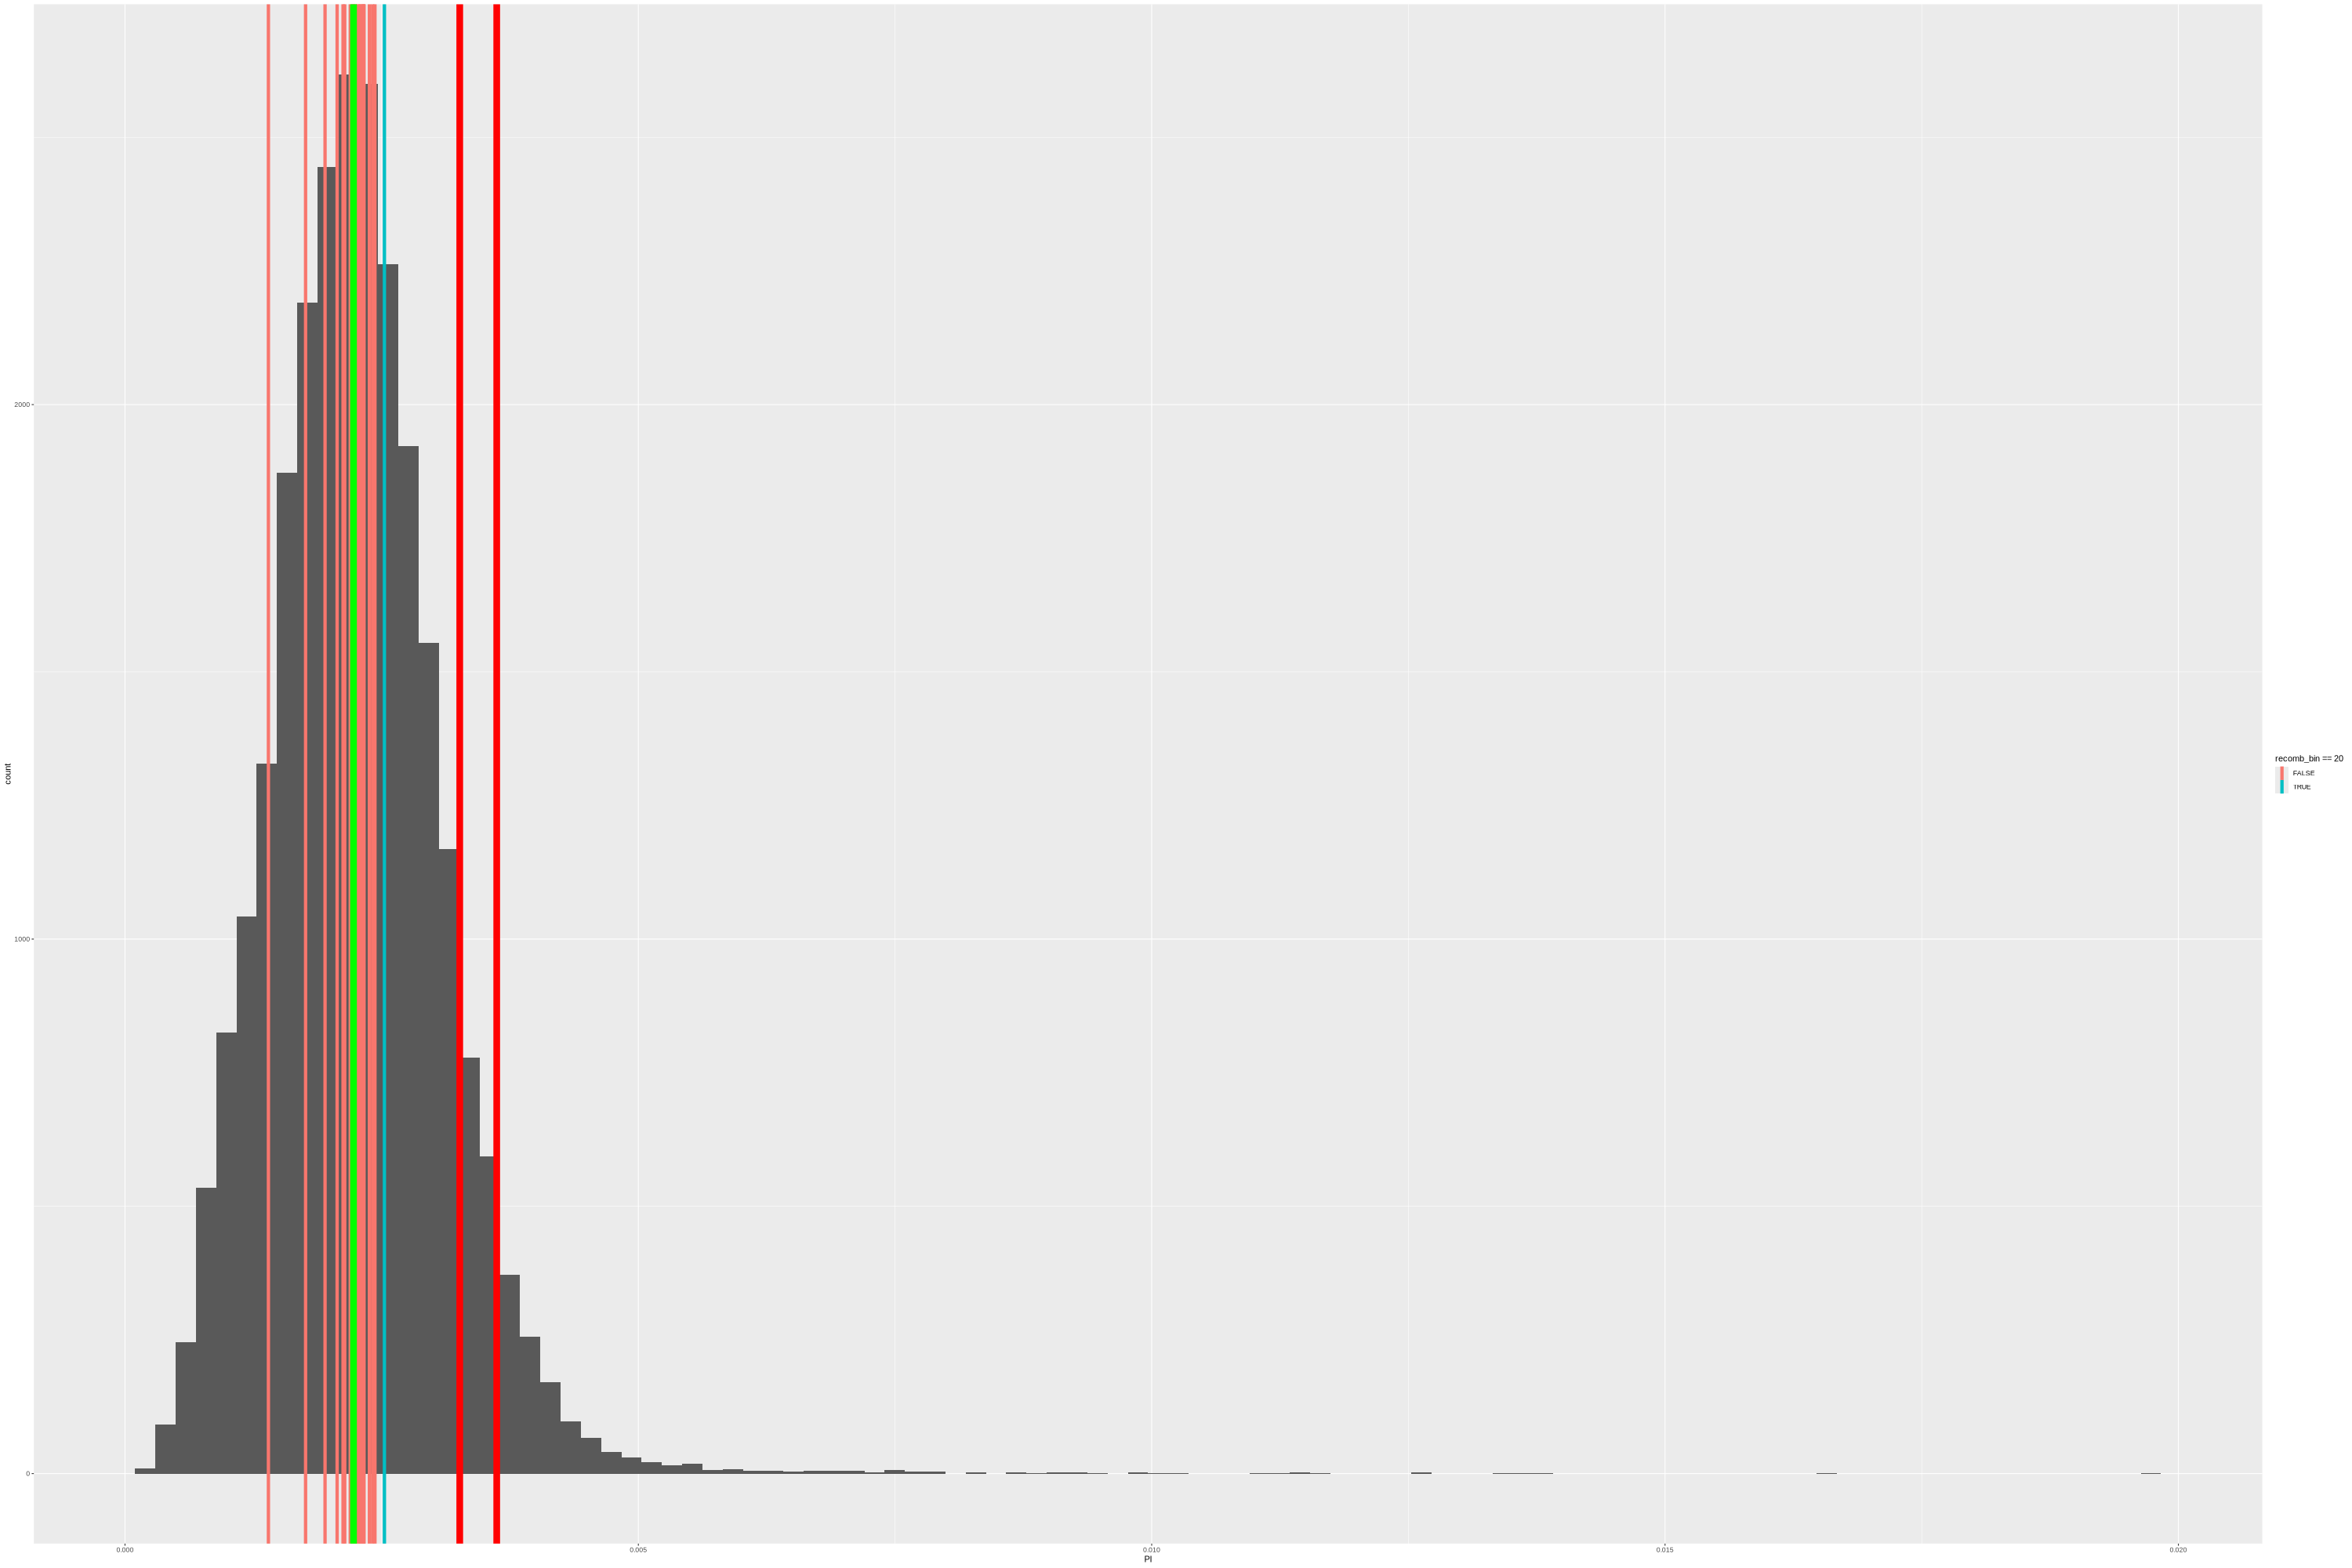

In [30]:
%%R -h 2000 -w 3000
each_species %>% filter(freq_mean > 0.5) %>% 
    filter(!(chr=='chrX')) %>% 
    filter(species=='gorilla') %>%
    ggplot(aes(x=PI)) +
    geom_histogram(bins=100) +
    geom_vline(aes(xintercept=median,col=recomb_bin==20),size = 2) +
    geom_vline(aes(xintercept=total_median),col='green',size=4) +
    geom_vline(aes(xintercept=quan90),col='red', size = 4) +
    geom_vline(aes(xintercept=quan95),col='red', size = 4) 

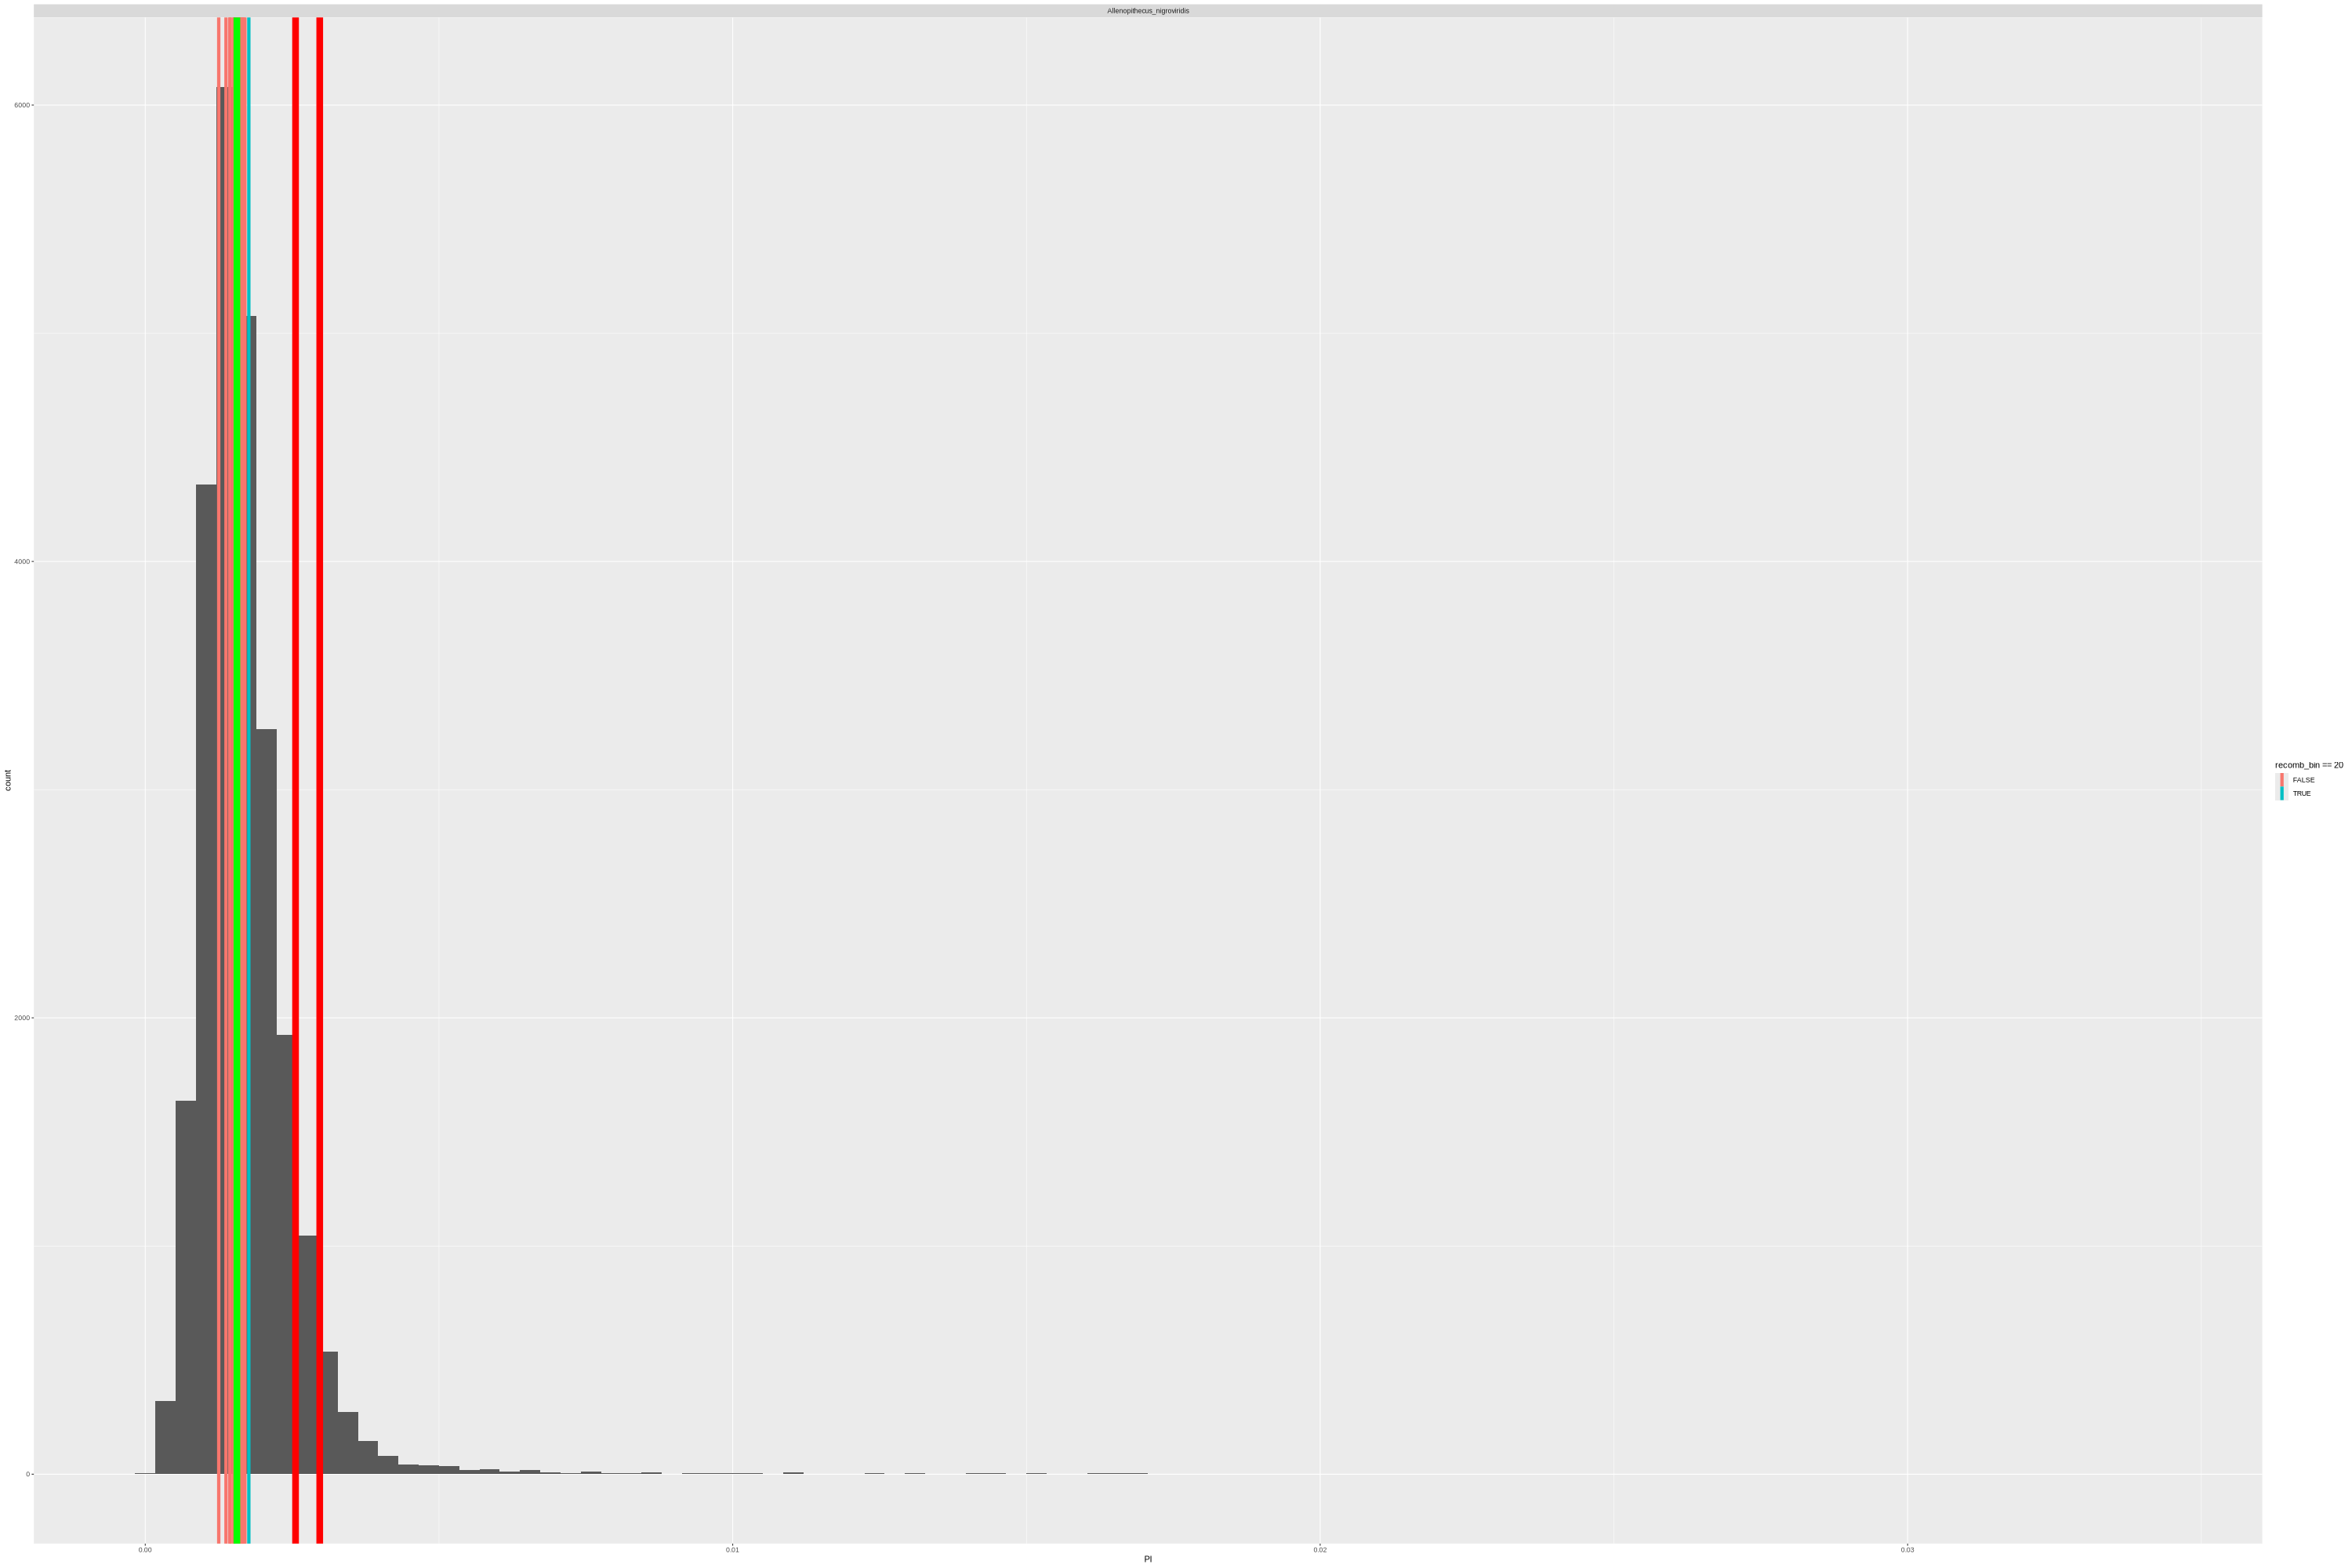

In [31]:
%%R -h 2000 -w 3000
each_species %>% filter(freq_mean > 0.5) %>% 
    filter(!(chr=='chrX')) %>% 
    filter(name=='Allenopithecus_nigroviridis') %>%

    ggplot(aes(x=PI)) +
    geom_histogram(bins=100) +
    geom_vline(aes(xintercept=median,col=recomb_bin==20),size=2) +
    geom_vline(aes(xintercept=total_median),col='green',size=4) +
    geom_vline(aes(xintercept=quan90),col='red', size = 4) +
    geom_vline(aes(xintercept=quan95),col='red', size = 4) +
    facet_wrap(name~.,scales='free_x')

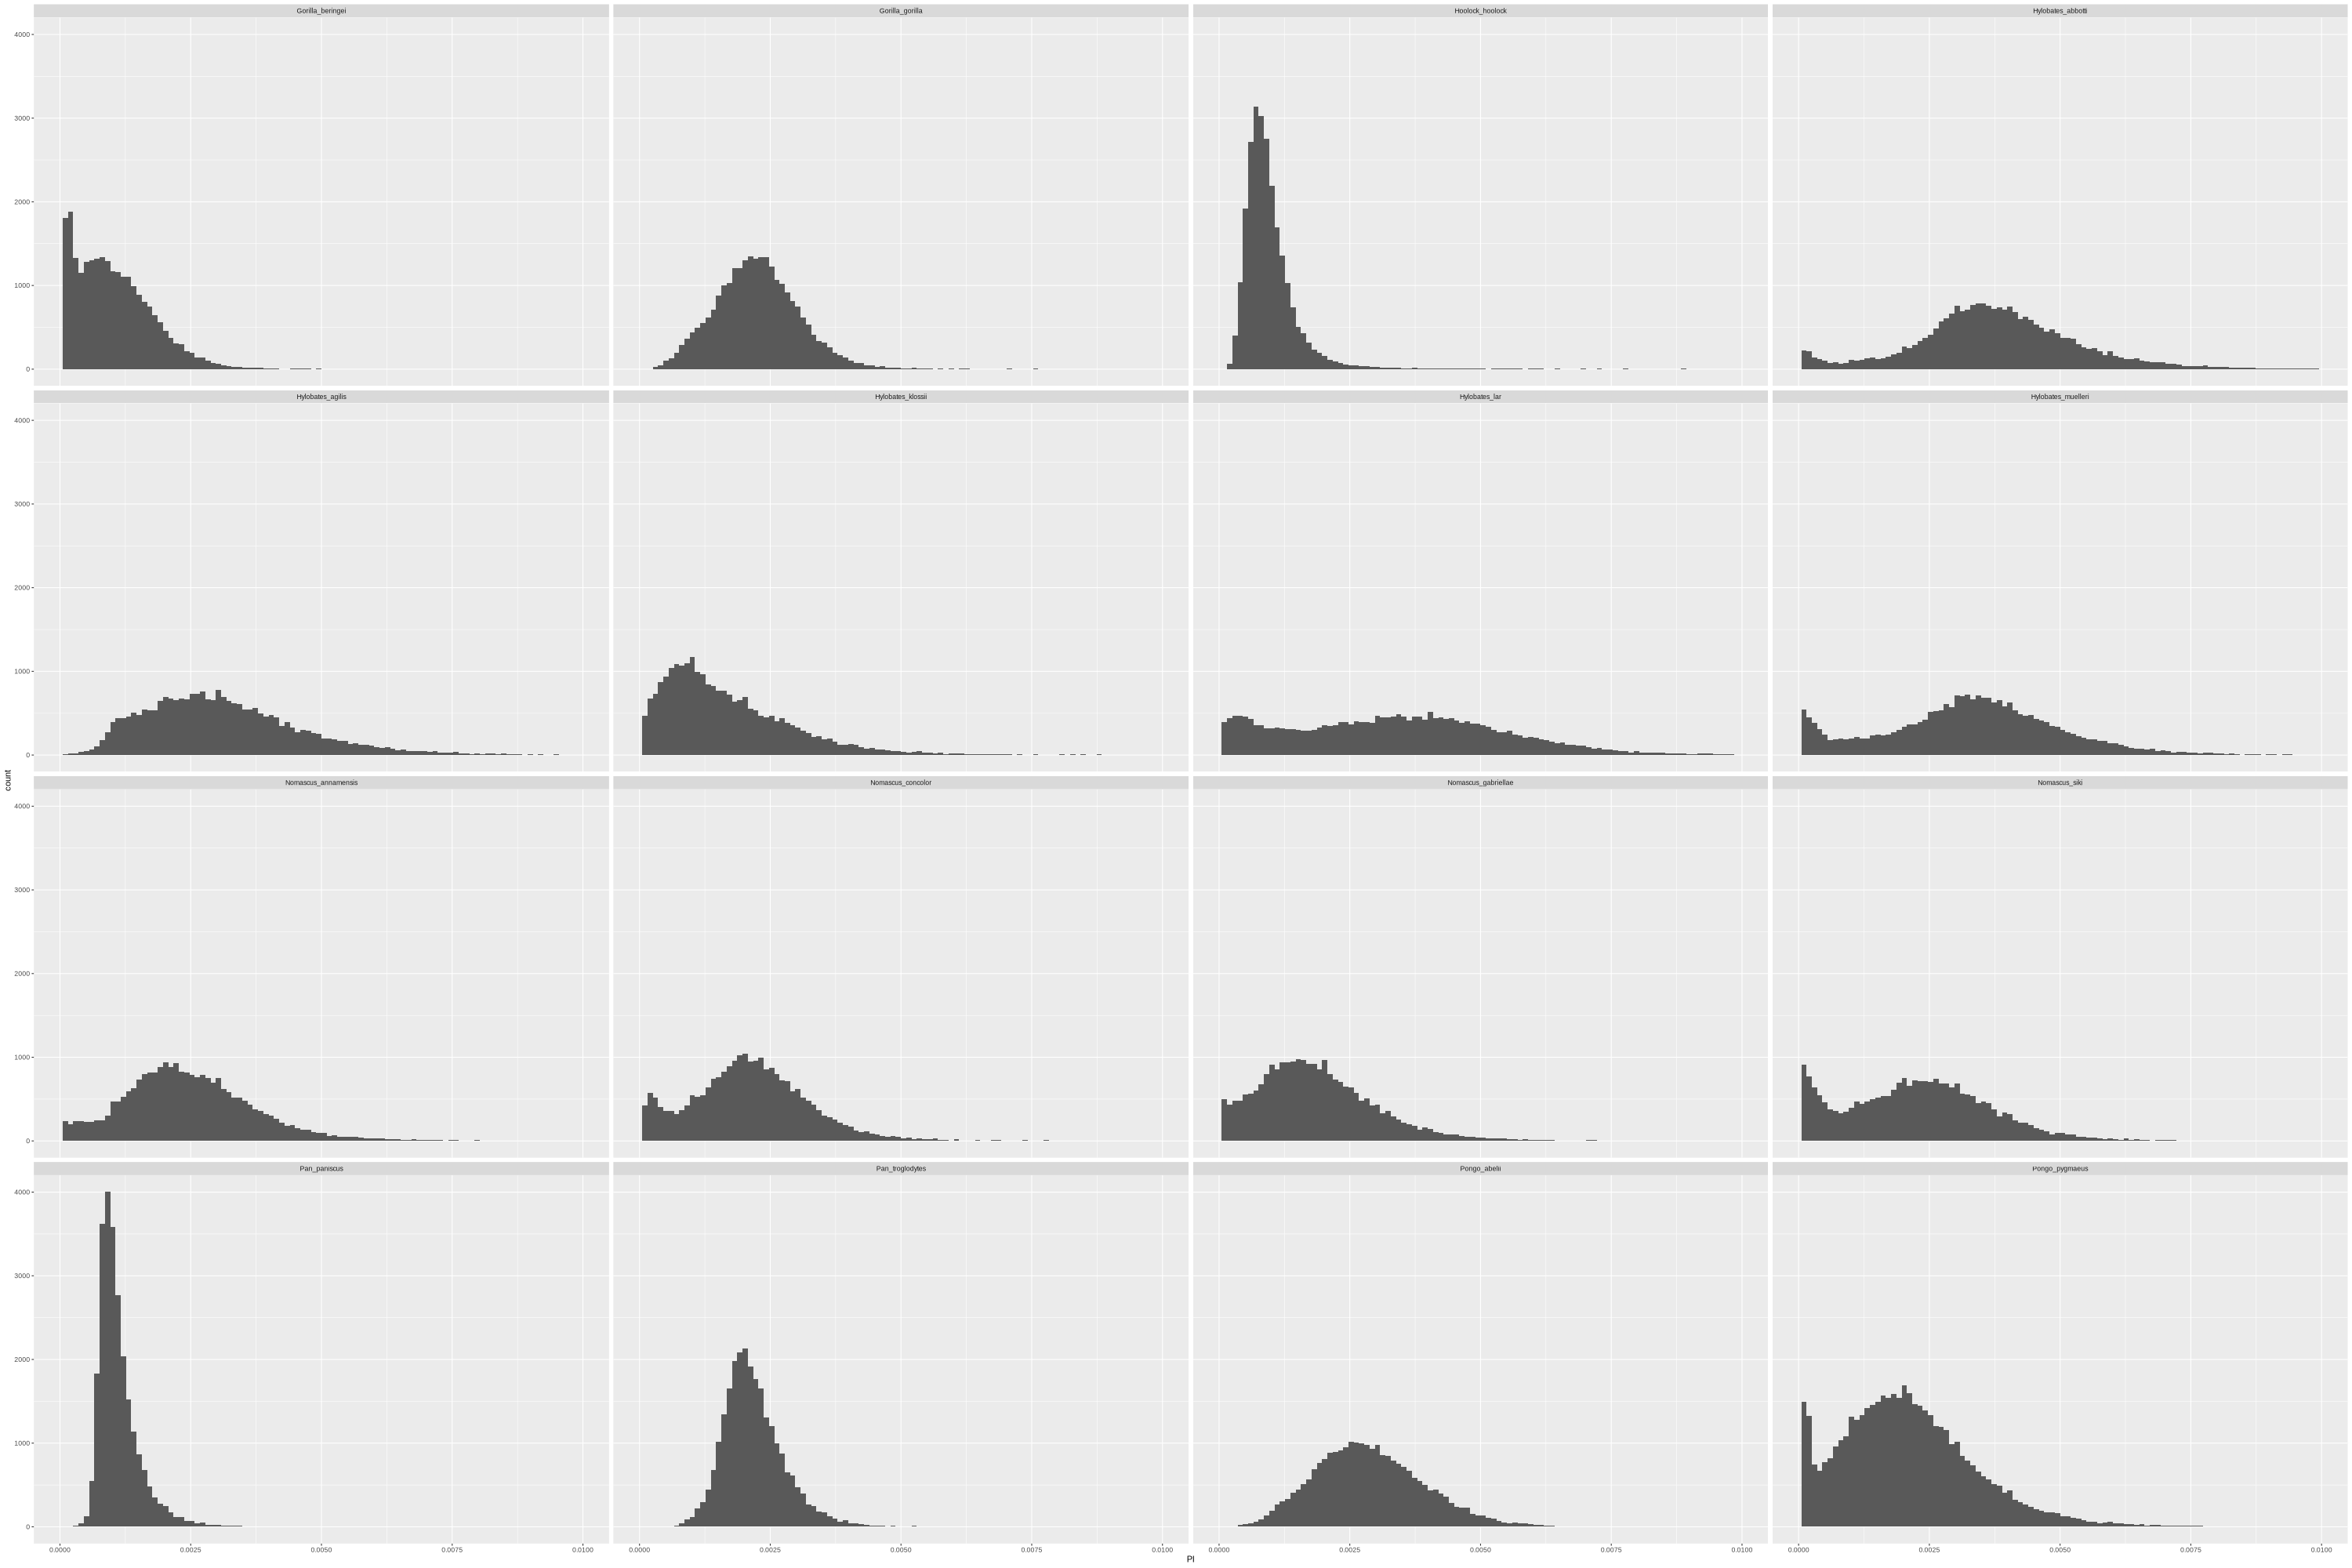

In [181]:
%%R -h 2000 -w 3000
each_species %>% filter(freq_mean > 0.5) %>% 
    filter(!(chr=='chrX')) %>% 
    filter(pg_name=='Great_apes') %>%

    ggplot(aes(x=PI)) +
    geom_histogram(bins=100) +
    #geom_vline(aes(xintercept=median,col=recomb_bin==20)) +
    facet_wrap(name~.)+
    xlim(0,0.01)
    #geom_vline(aes(xintercept=median,col=recomb_bin==20),size=2) +
    #geom_vline(aes(xintercept=total_median),col='green',size=4) +
    #geom_vline(aes(xintercept=quan90),col='red', size = 4) +
    #geom_vline(aes(xintercept=quan95),col='red', size = 4) 


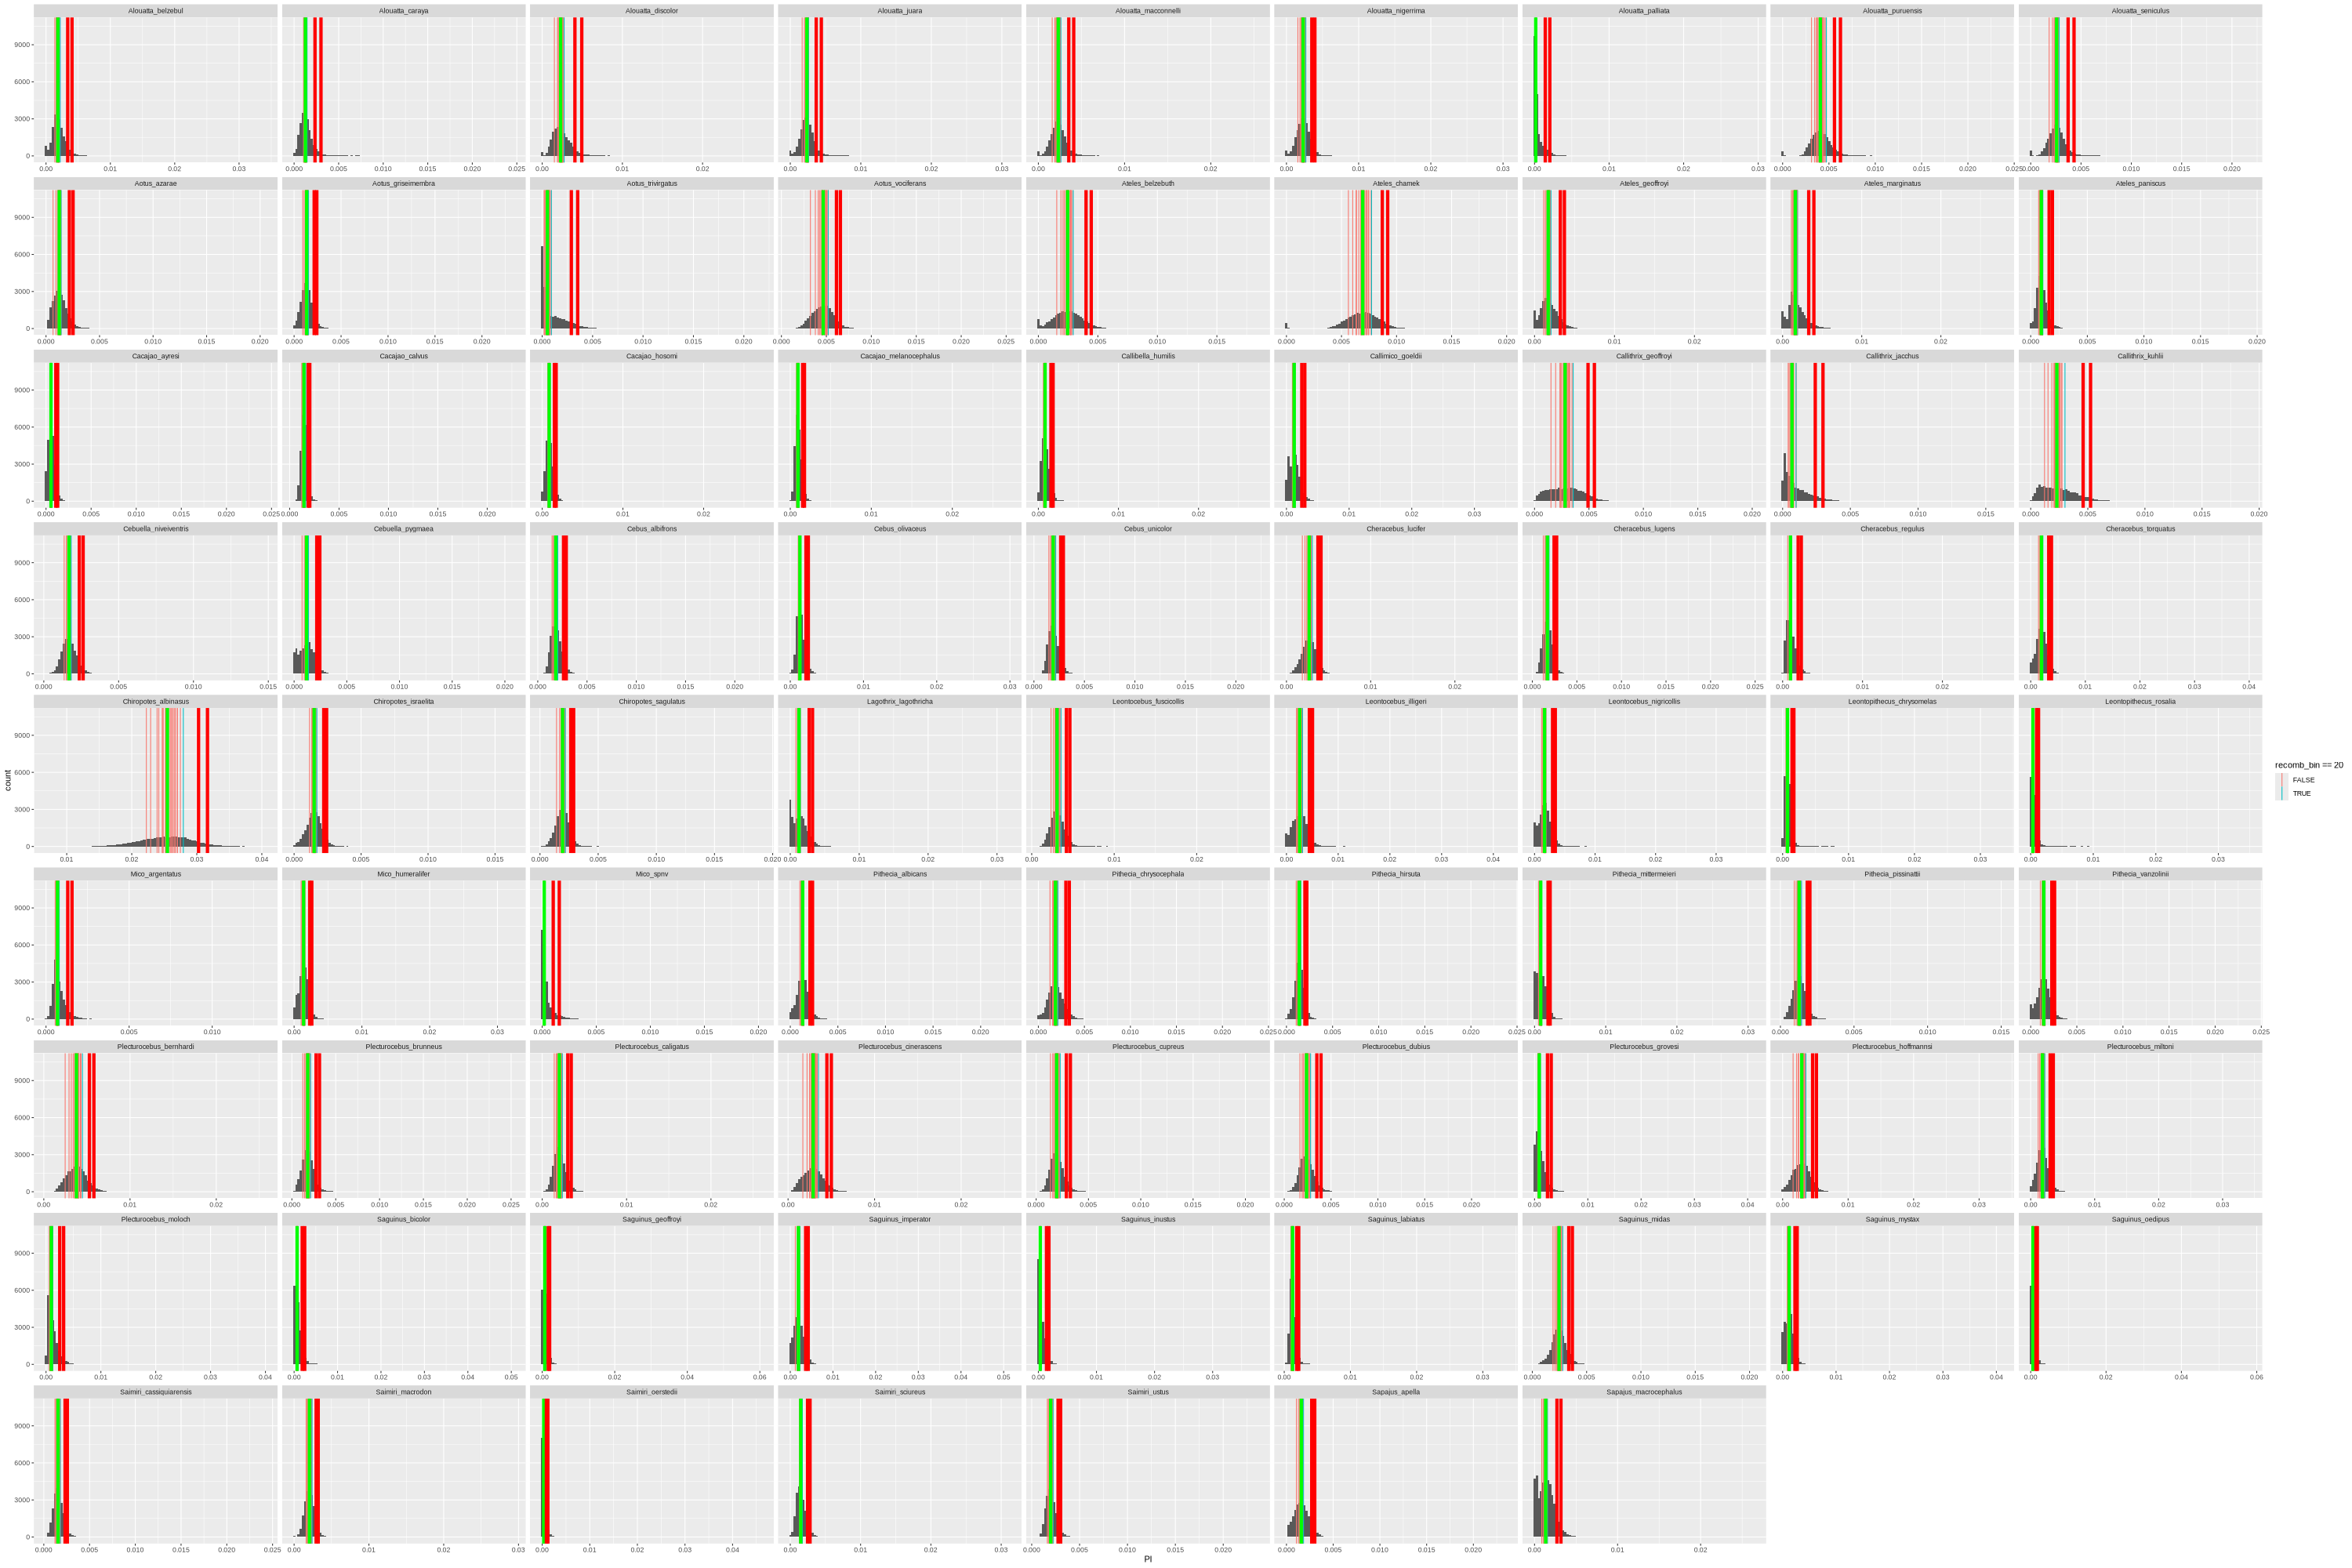

In [33]:
%%R -h 2000 -w 3000
each_species %>% filter(freq_mean > 0.5) %>% 
    filter(!(chr=='chrX')) %>% 
    filter(pg_name=='New_world_monkeys') %>%

    ggplot(aes(x=PI)) +
    geom_histogram(bins=100) +
    geom_vline(aes(xintercept=median,col=recomb_bin==20)) +
    geom_vline(aes(xintercept=total_median),col='green',size=2) +
    geom_vline(aes(xintercept=quan90),col='red', size = 2) +
    geom_vline(aes(xintercept=quan95),col='red', size = 2) +
    facet_wrap(name~.,scales='free_x')

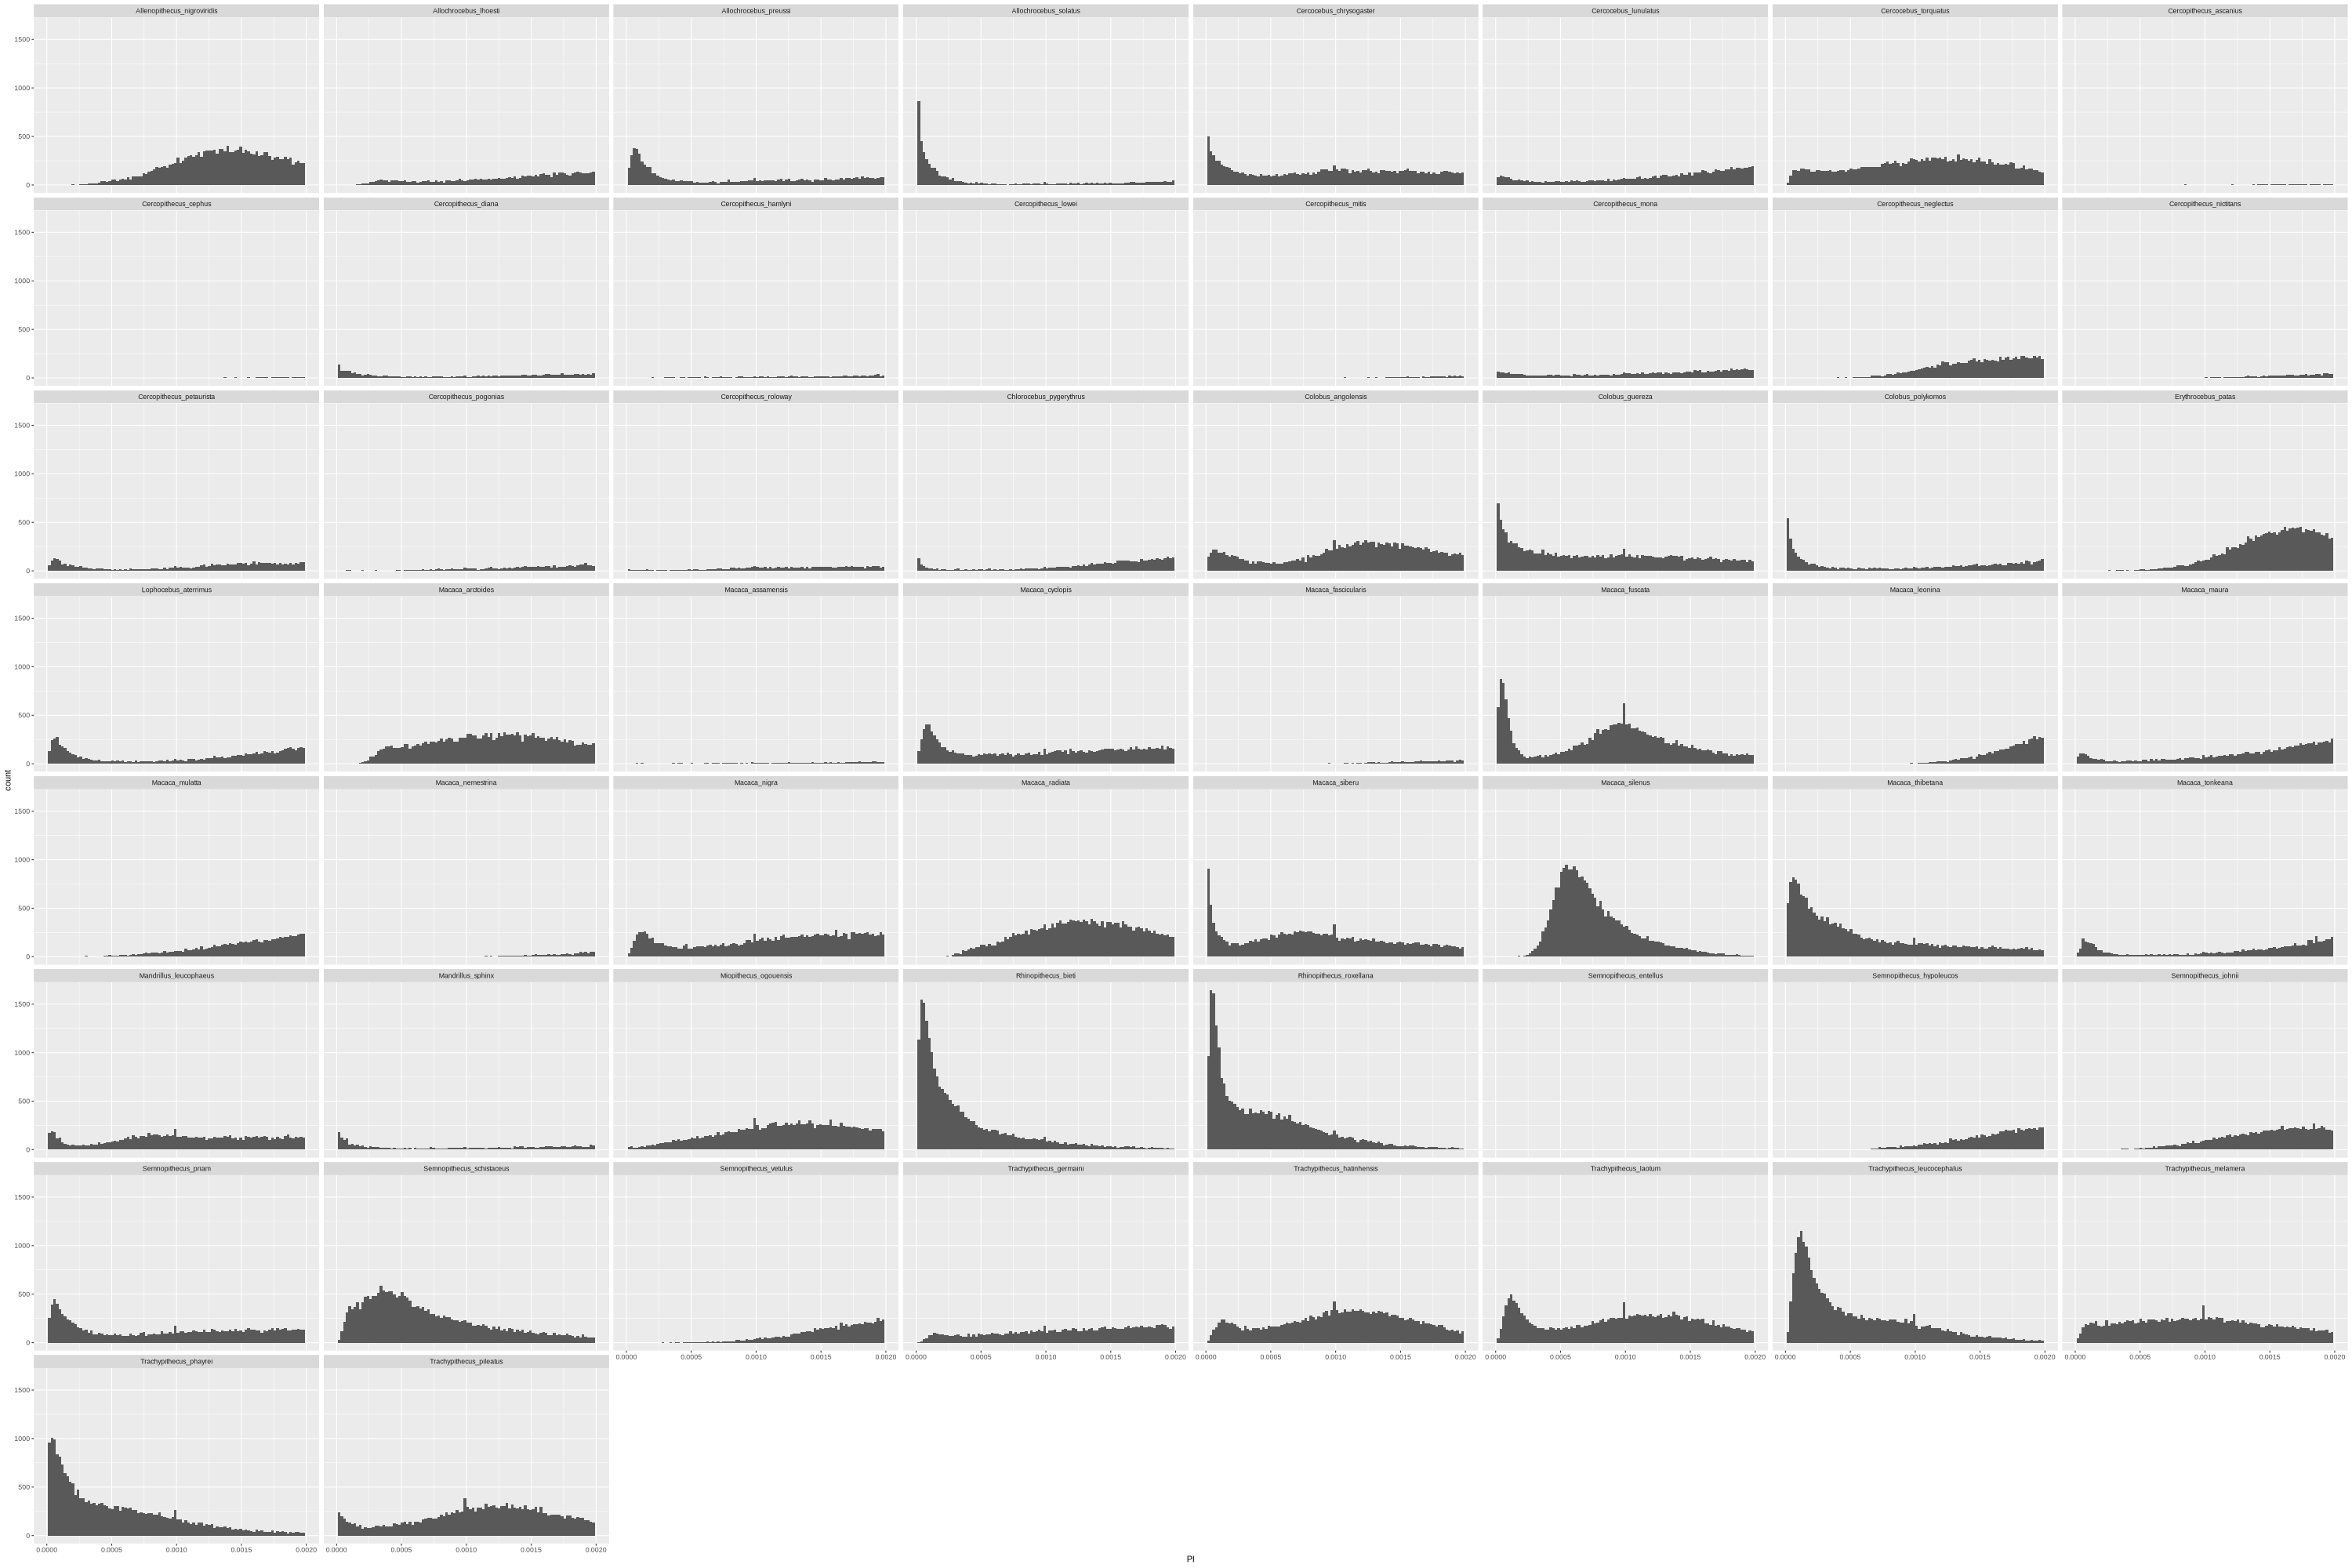

In [178]:
%%R -h 2000 -w 3000
each_species %>% filter(freq_mean > 0.5) %>% 
    filter(!(chr=='chrX')) %>% 
    filter(pg_name=='Old_world_monkeys') %>%

    ggplot(aes(x=PI)) +
    geom_histogram(bins=100) +
    #geom_vline(aes(xintercept=median,col=recomb_bin==20)) +
    #geom_vline(aes(xintercept=total_median),col='green',size=2) +
    #geom_vline(aes(xintercept=quan90),col='red', size = 2) +
    #geom_vline(aes(xintercept=quan95),col='red', size = 2) +
    xlim(0,0.002)+
    facet_wrap(name~.)

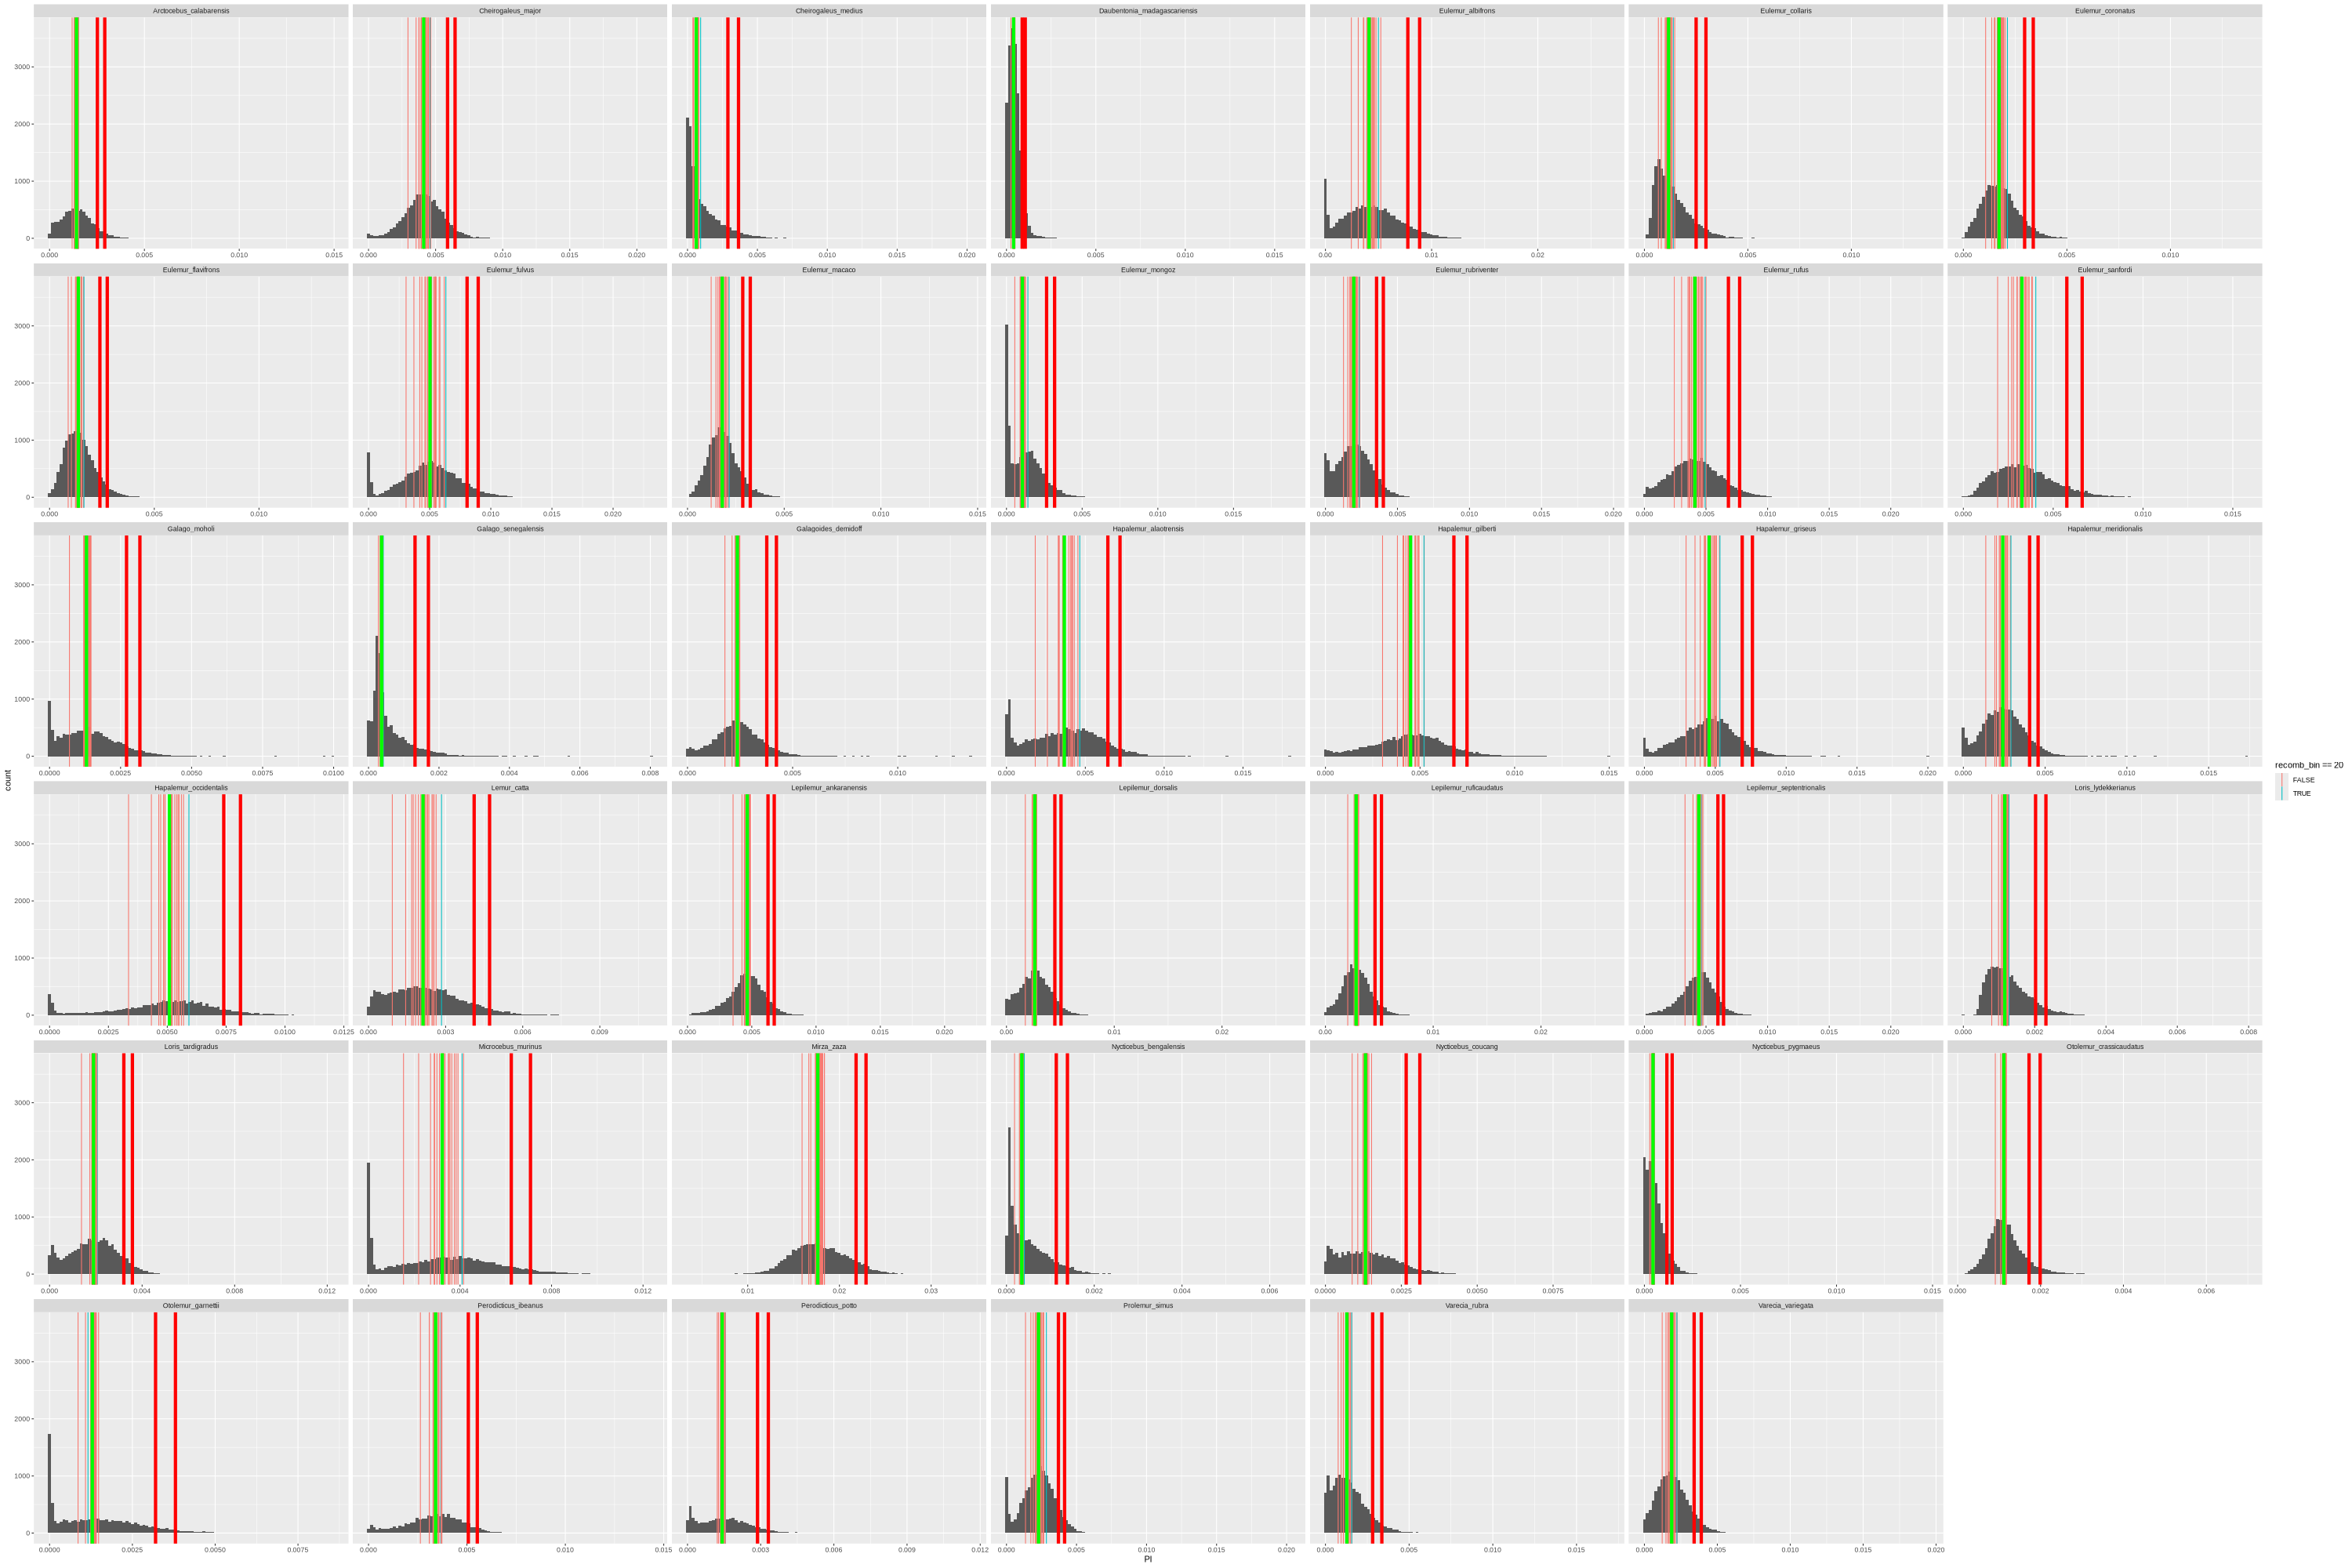

In [35]:
%%R -h 2000 -w 3000
each_species %>% filter(freq_mean > 0.5) %>% 
    filter(!(chr=='chrX')) %>% 
    filter(pg_name=='Prosimians') %>%

    ggplot(aes(x=PI)) +
    geom_histogram(bins=100) +
    geom_vline(aes(xintercept=median,col=recomb_bin==20)) +
    geom_vline(aes(xintercept=total_median),col='green',size=2) +
    geom_vline(aes(xintercept=quan90),col='red', size = 2) +
    geom_vline(aes(xintercept=quan95),col='red', size = 2) +
    facet_wrap(name~.,scales='free_x')

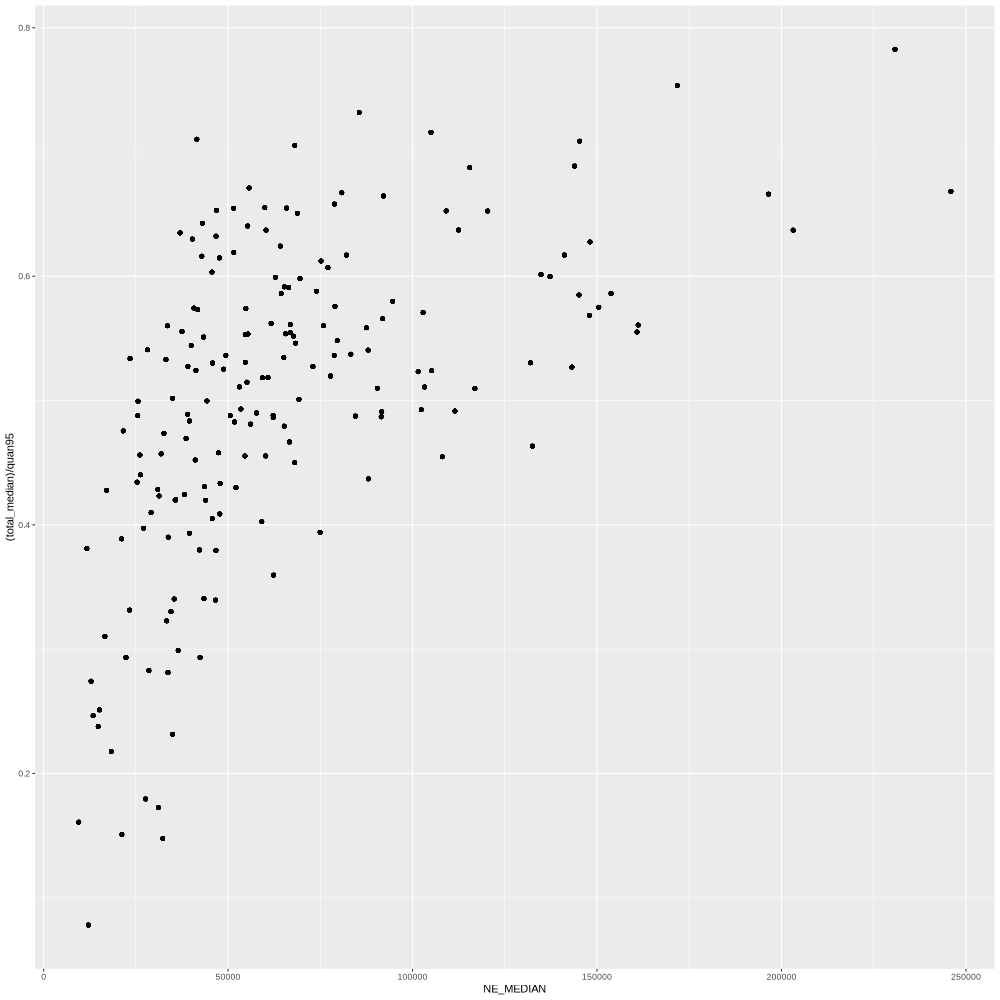

In [206]:
%%R -h 1000 -w 1000
df %>%
    ggplot(aes(x=NE_MEDIAN,y=(total_median)/quan95))+
    geom_point()